# CUSTOMER CHURN PREDICTION


### Business Understanding

##### **Problem Statements:**  Customer churn is one of the most critical issues faced by telecommunication companies which is a s a result of customer dissatisfaction over the companies services.This can lead to reduced revenue and high customer acquisition cost.
##### **Project Goal:** To conduct a comprehensive exploratory data analysis on dataset provided and build a robust maching learning pipeline to predict whether certain customers will churn or not and develop a retention strategy.
- building the model using certain machine learning algorithms that will predict
whether the customer will churn out or not
- Identify the causes of churn
- identify the demographic segments most impacted, and explore potential areas for intervention.
- To compare the algorithms that are effective in reducing churn rate in telecom companies
##### Stakeholders
- Business Team
- Telco Company
##### **Key Metrics and Success Criteria:**
Key metrics include: Churn rate, customer lifetime value, average revenue per user and customer satisfaction.
- Success criteria include:
- model accuracy score of at least 85% on balanced data
-F1 score > 0.8
- recall score and precision score
- ROC-AUC(Reciever operating characteristics) :This is a measure of the model’s ability to distinguish between churners and non-churners.ROC curve of 80% is ideal
- At least 4 baseline models(Baseline models serve as a benchmark in an ML application. Their main goal is to put the results of trained models into context.)
- hyperparameter tuning should be applied to baseline models if they exceed their F1 score

##### **Features**:
The data for this project is in a csv format. The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card    (automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)

##### **Null Hypothesis**: There is no significant difference between Tenure and the likelihood of customer churn.
**Alternate Hypothesis**: There is a significant difference between tenure and the likelihood of customer churn.
##### **Analytical Questions**:

- What is the overall churn rate for the company? What is the average tenure of customers who churned compared to those who stayed?
- How does the churn rate vary month by month?
- How do different factors (  senior citizen,payment method,OnlineSecurity etc.) influence the likelihood of customer churn?
- What is the financial impact of customer churn on the company’s revenue?


### Data Understanding

##### Importations

In [80]:
# Data manipulation packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
from dotenv import dotenv_values
import warnings 

warnings.filterwarnings('ignore')

from scipy.stats import mannwhitneyu 
from scipy.stats import chi2_contingency
from scipy.stats import stats
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import QuantileTransformer,PowerTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, log_loss, accuracy_score
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier

from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score
import os
import joblib


##### Loading the Datasets

In [81]:
# Load environment variables from .env file into a dictionary to access the first dataset
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [82]:
connection = pyodbc.connect(connection_string)

In [83]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
data2 = pd.read_csv('LP2_Telco-churn-second-2000.csv')
data2.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [85]:
#import the test data

test_df = pd.read_excel('..\data\Telco-churn-last-2000.xlsx')

In [86]:
#merge data1 and data2 together
df = pd.concat([data1, data2],axis = 0)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,9305-CDSKC,Female,0,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.5,True
6,1452-KIOVK,Male,0,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False
7,6713-OKOMC,Female,0,False,False,10,False,None,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
8,7892-POOKP,Female,0,True,False,28,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,104.800003,3046.050049,True
9,6388-TABGU,Male,0,False,True,62,True,False,DSL,True,...,False,False,False,False,One year,False,Bank transfer (automatic),56.150002,3487.949951,False


##### Exploratory Data Analysis(EDA)
- Data Quality Assessment & Exploring data


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [88]:
#convert Totl charges to float
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors ='coerce')

#convert the SeniorCitizen column to boolean
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [90]:
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [93]:
df.describe(include ='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


In [94]:
# check the unique values in the dataframe
columns = df.columns
for column in columns:
    print(f'{column}')
    print(f' There are {df[column].unique().size} unique values')
    print(f'{df[column].unique()}')
    print('=' * 50)


customerID
 There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
 There are 2 unique values
['Female' 'Male']
SeniorCitizen
 There are 2 unique values
[False  True]
Partner
 There are 4 unique values
[True False 'No' 'Yes']
Dependents
 There are 4 unique values
[False True 'No' 'Yes']
tenure
 There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
 There are 4 unique values
[False True 'Yes' 'No']
MultipleLines
 There are 6 unique values
[None False True 'No' 'No phone service' 'Yes']
InternetService
 There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
 There are 6 unique values
[False True None 'No' 'Yes' 'No internet service']
OnlineBackup
 There are 6 unique values
[True False None 'No' 'Yes' 'No

In [95]:
# remapping True to Yes and false to No

#list columns to standardize
cat_cols = ['Partner','Dependents','PhoneService','MultipleLines',
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies','PaperlessBilling','Churn']


# define a function to standardize columns
def standardize_value(value):   
    if value in [True, 'Yes']:
        return 'Yes'
    elif value in [False, 'No']:
        return 'No'
    else:
        return value
    
# Step 4: Apply the standardize_value function to the specified columns
for col in cat_cols:
    df[col] = df[col].apply(standardize_value)

#previe
df['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [96]:
# check the unique values in the dataframe
columns = df.columns
for column in columns:
    print(f'{column}')
    print(f' There are {df[column].unique().size} unique values')
    print(f'{df[column].unique()}')
    print('=' * 50)


customerID
 There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
 There are 2 unique values
['Female' 'Male']
SeniorCitizen
 There are 2 unique values
[False  True]
Partner
 There are 2 unique values
['Yes' 'No']
Dependents
 There are 2 unique values
['No' 'Yes']
tenure
 There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
 There are 2 unique values
['No' 'Yes']
MultipleLines
 There are 4 unique values
[None 'No' 'Yes' 'No phone service']
InternetService
 There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
 There are 4 unique values
['No' 'Yes' None 'No internet service']
OnlineBackup
 There are 4 unique values
['Yes' 'No' None 'No internet service']
DeviceProtection
 There are 4 unique values
['

##### Univariate Analysis
###### **Numerical Variables:**

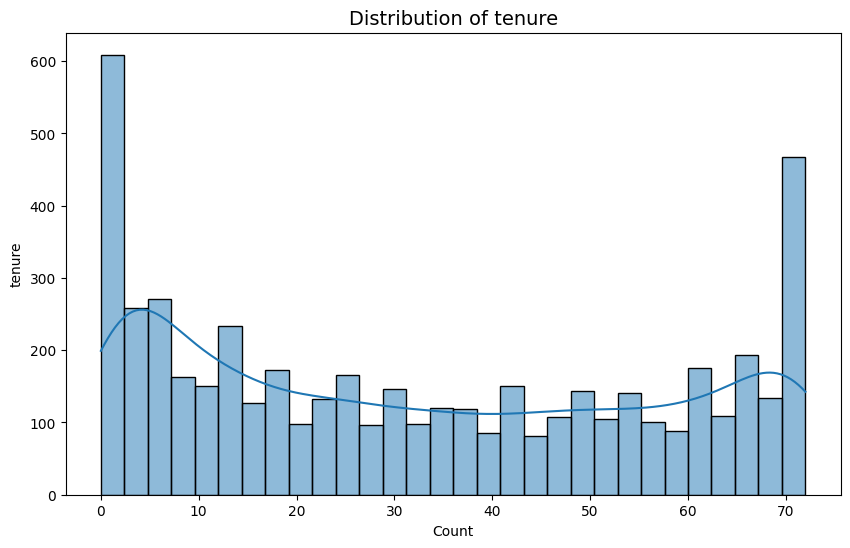

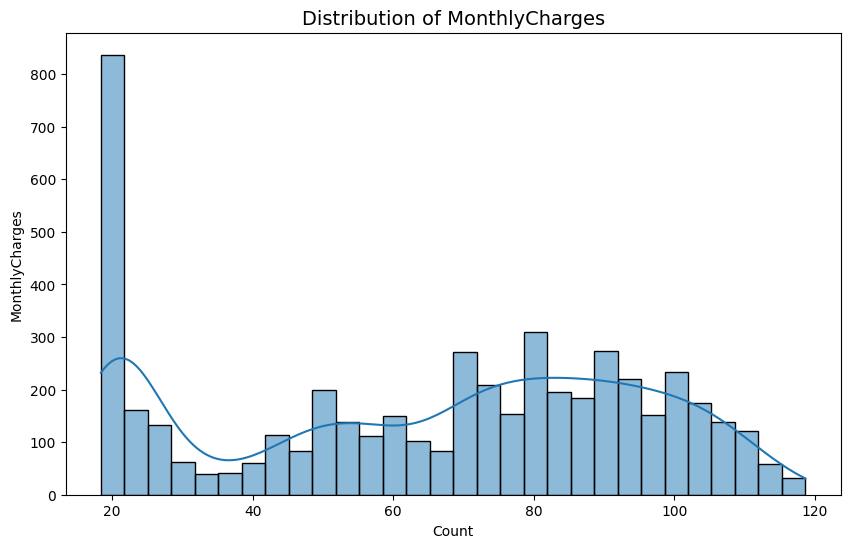

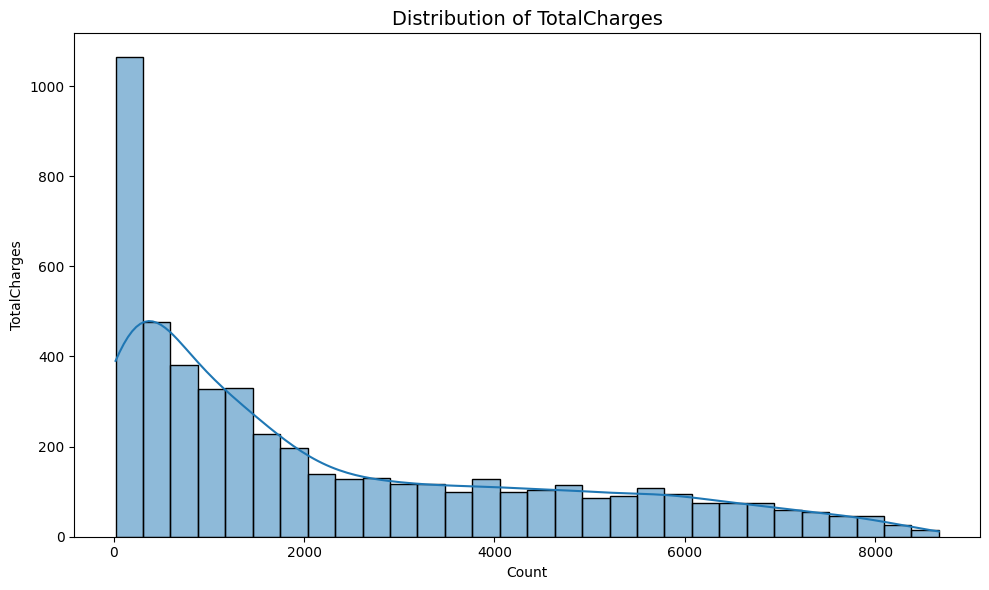

In [97]:
# Distribution of numeric columns
#select numeric columns from dataframe
num_var = df[['tenure','MonthlyCharges','TotalCharges']]

#user a for loop to iterate over the columns
for idx, col in enumerate(num_var):
    #set the size
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    #add titile to the graph
    plt.title(f'Distribution of {col}', fontsize=14)
    #add x and y labels
    plt.xlabel('Count')
    plt.ylabel(col)
    
plt.tight_layout()
#display the plot
plt.show()

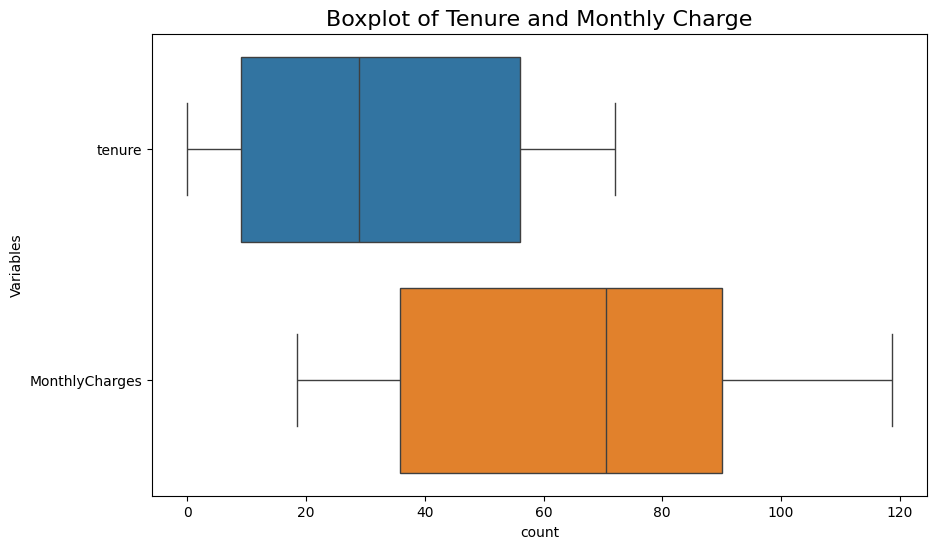

In [98]:
# check for outliers in the numeric columns
# Set the size for the entire figure
plt.figure(figsize=(10, 6))

# Remove 'TotalCharges' from the list of numerical columns due to its high values
num_var = [col for col in num_var if col != 'TotalCharges']

# Plotting box plots for all numerical columns in num_var
sns.boxplot(df[num_var],orient = 'h')

# Add a title to the entire figure
plt.title('Boxplot of Tenure and Monthly Charge', fontsize=16)
# Add x and y labels
plt.xlabel('count')
plt.ylabel('Variables')

# Display the plot
plt.show()


<Axes: >

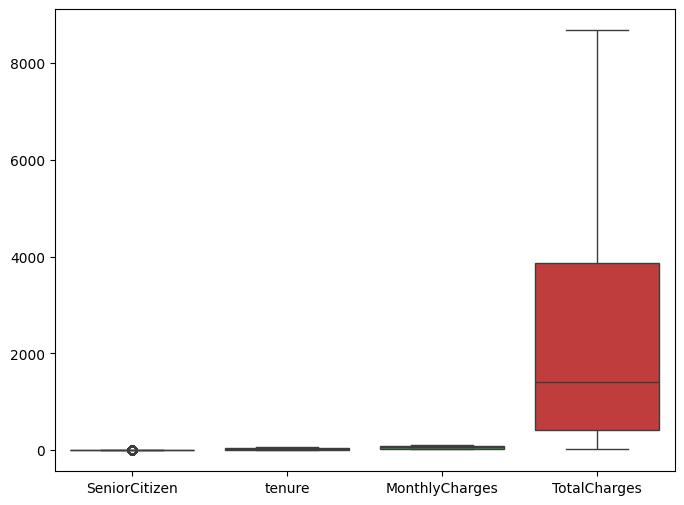

In [99]:
plt.figure(figsize =(8,6))
sns.boxplot(df)

##### Key Insights
- The datatype for Total Charges column should be float and not objects
- There are no duplicate values for this project
- MultipleLines, OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies columns have nulls values
- The SeniorCitizen column is highly skewed towards 0, indicating that the majority of the customers are not senior citizens. The mean is much closer to 0 than 1, and the median is 0, showing that at least half of the data points are 0. This indicates that the data are not evenly distributed.
- The tenure column has a mean (32.58) that is fairly close to the median (29), but the wide interquartile range (IQR) from 9 to 56 months, along with a minimum of 0 and a maximum of 72, suggests that the data are spread out and not evenly distributed. There are customers with very short and very long tenures, leading to a likely right-skewed distribution.
- The MonthlyCharges column has a mean (65.09) that is lower than the median (70.55), suggesting a left-skewed distribution. The wide IQR from 35.78 to 90.05 and a standard deviation of 30.07 dollars indicate variability in the data. Therefore, the monthly charges are not evenly distributed.
- The TotalCharges column shows a mean (2302.06) that is considerably higher than the median (1401.15), indicating a right-skewed distribution. The very high standard deviation (2269.48) and the wide range between the 25th and 75th percentiles also suggest significant variability in the data. Thus, the total charges are not evenly distributed.
- Based on the provided summary statistics, none of the columns appear to be evenly distributed. The SeniorCitizen column is highly skewed towards non-senior citizens, tenure shows a wide spread with possible right skewness, MonthlyCharges indicates left skewness, and TotalCharges displays significant variability with right skewness. The data distributions are characterized by skewness and variability, indicating they are not even.
- The numerical faetures of the dataset is not evenly distributed.
- Most categorical columns have True, False, Yes, No. we will map them to either yes or no.
- the boxplots shows that we do not have outliers but however needs scaling for machine learning

###### **Categorical Variable**

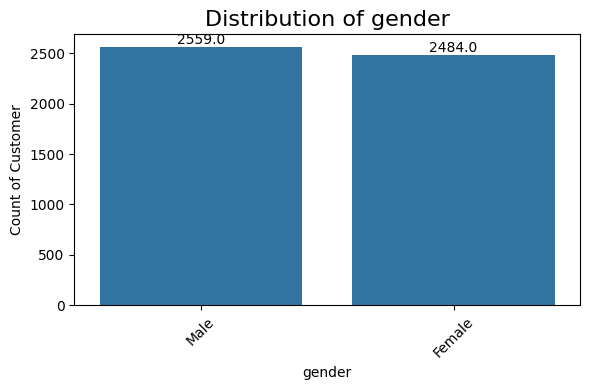

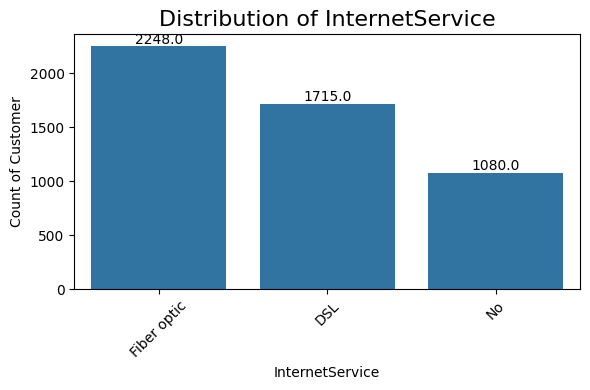

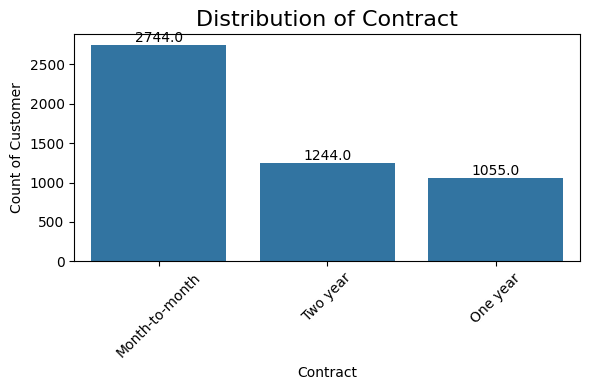

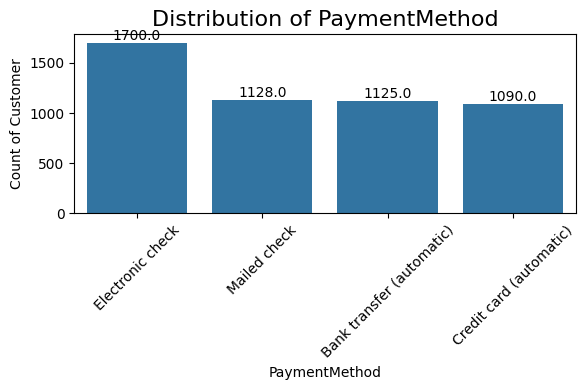

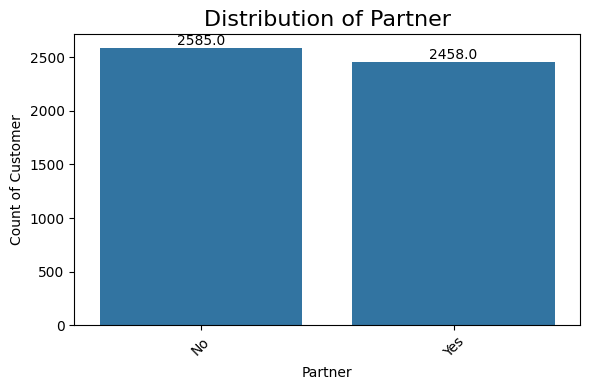

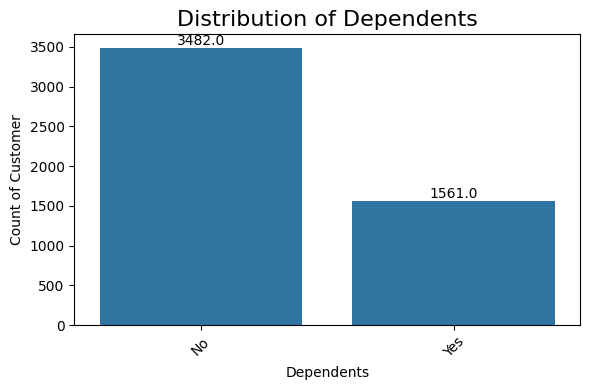

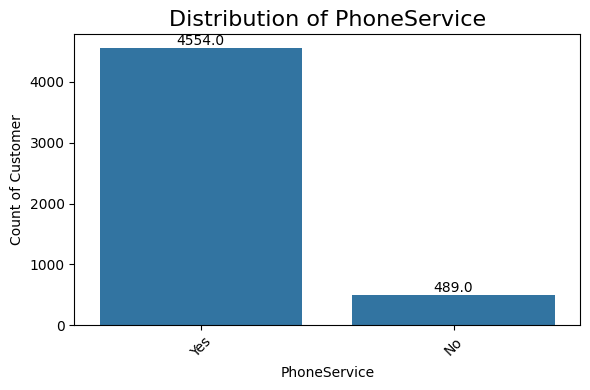

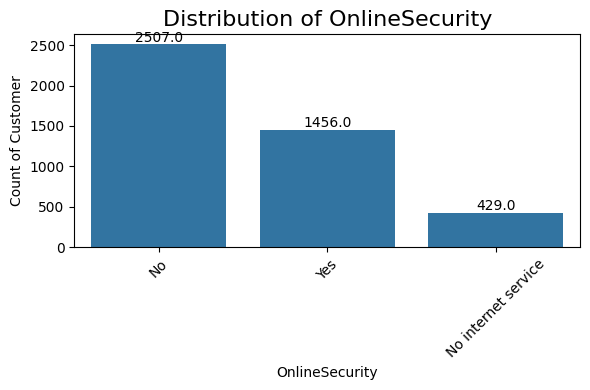

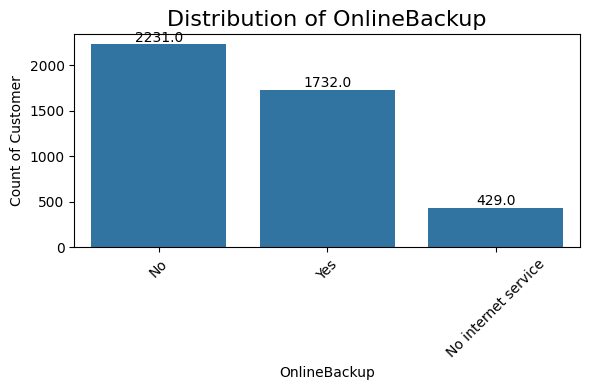

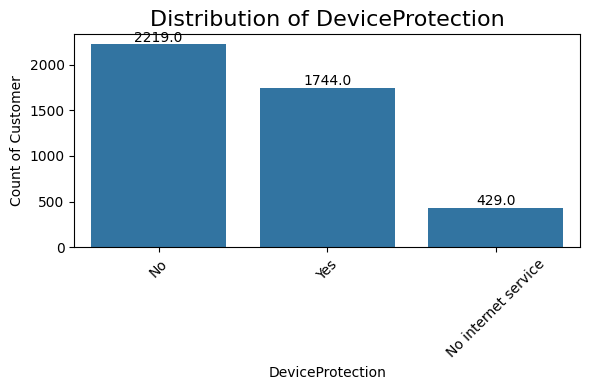

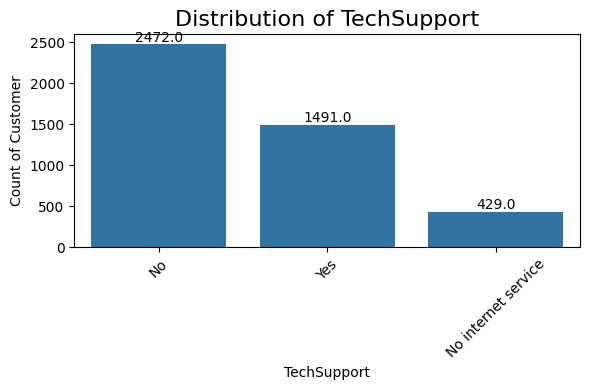

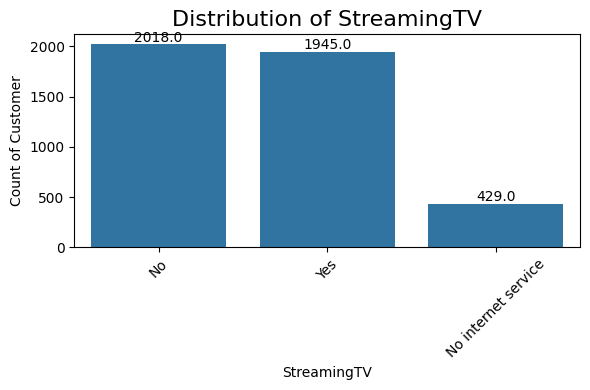

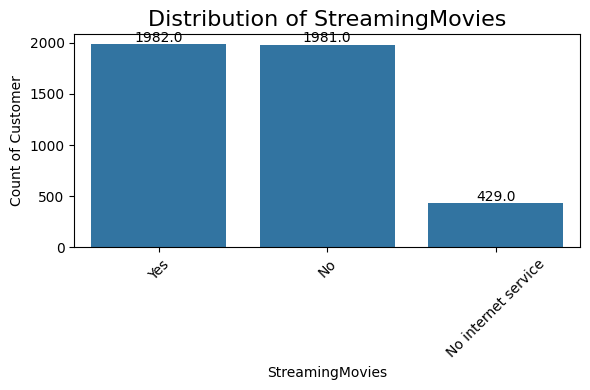

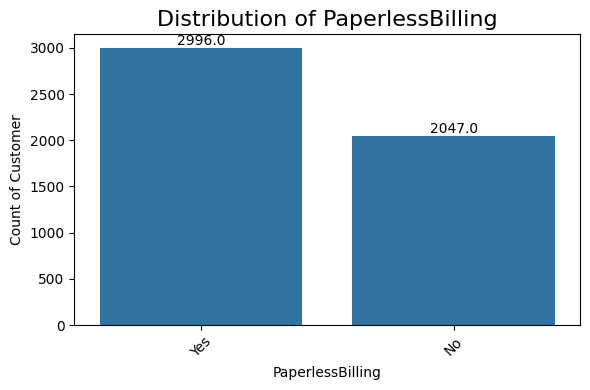

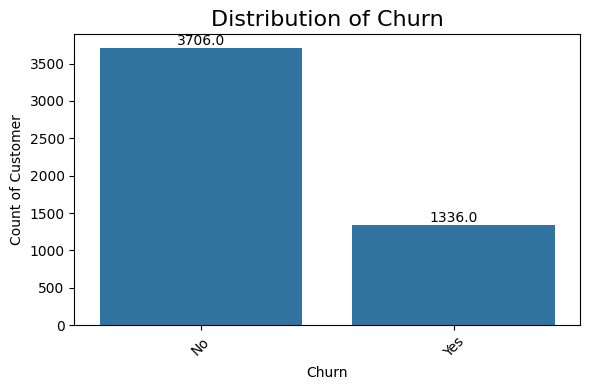

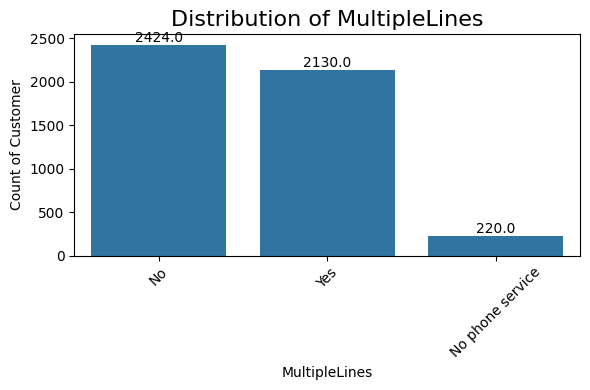

In [100]:
cat_var = df[['gender','InternetService','Contract','PaymentMethod','Partner','Dependents','PhoneService',
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies','PaperlessBilling','Churn','MultipleLines']].astype('category')

#  Plot individual horizontal bar charts for each categorical variable, excluding nulls
for col in cat_var.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=cat_var[col].dropna(), order=cat_var[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.ylabel('Count of Customer')
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    
    # Add count labels on the bars
    ax = plt.gca()
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='center')

    plt.tight_layout()
    plt.show()

##### **Bivariate Analysis**
- This measures relationship between two variables

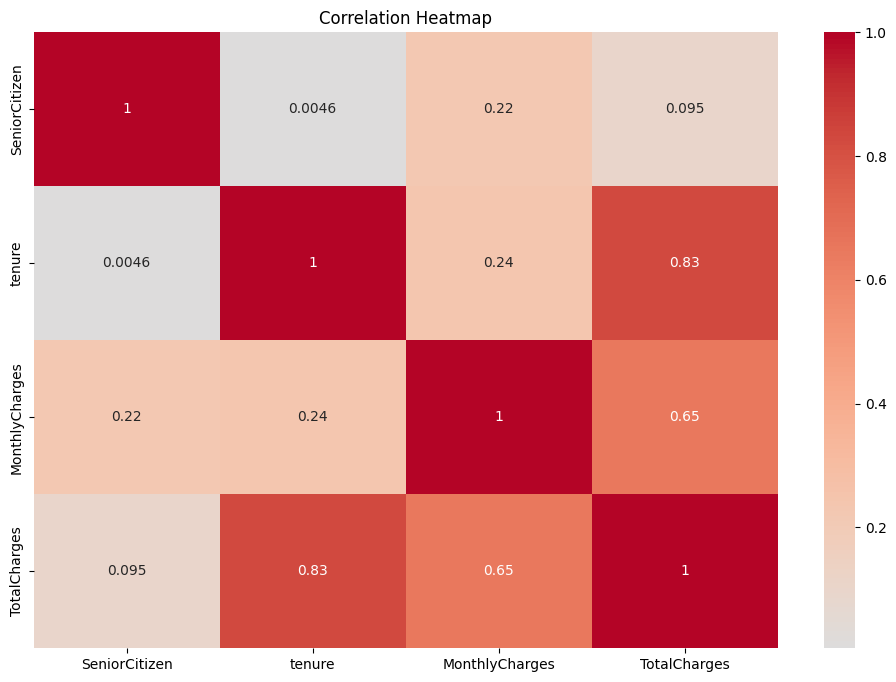

In [101]:
# Calculating the correlation matrix
corr = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


**Insights**
- Tenure has a strong positive correlation with TotalCharges (0.83), indicating that customers with longer tenure have higher total charges and Weak negative correlation with Churn (-0.35), indicating that customers with longer tenure are less likely to churn.
- Monthly Charges has a moderate positive correlation with TotalCharges (0.65), suggesting that higher monthly charges contribute to higher total charges and weak positive correlation with churn, indicating that customers with higher monthly charges may have a slight tendency churn.
- Senior citizen has a weak positive correlation with churn, suggesting it might have a minor role in predicting churn.


**Monthly Charges and Gender by Churn**

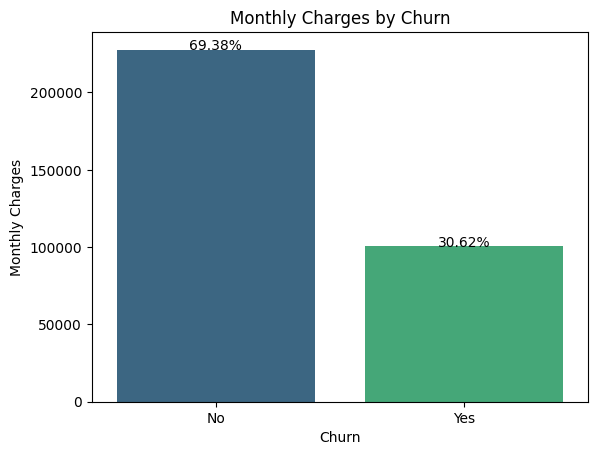

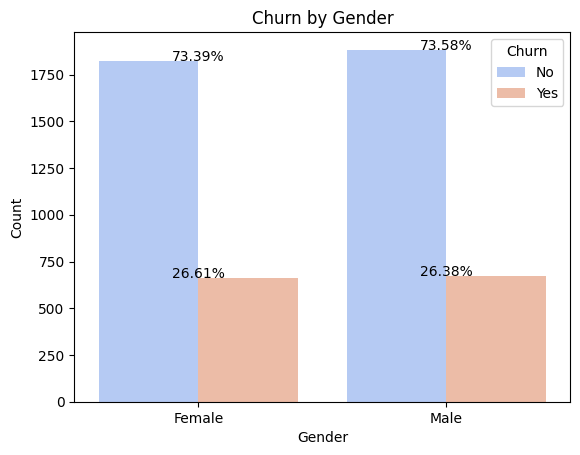

In [102]:

# Group and sum TotalCharges by Churn
Monthlycharges_by_Churn = df.groupby('Churn')['MonthlyCharges'].sum().reset_index()

# Calculate the percentage of churn
monthly_charges_sum = Monthlycharges_by_Churn['MonthlyCharges'].sum()
Monthlycharges_by_Churn['Percentage'] = (Monthlycharges_by_Churn['MonthlyCharges'] / monthly_charges_sum) * 100

# Plotting with Seaborn
sns.barplot(data=Monthlycharges_by_Churn, x='Churn', y='MonthlyCharges', palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn')

# Adding percentage labels
for index, row in Monthlycharges_by_Churn.iterrows():
    plt.text(index, row['MonthlyCharges'], f"{row['Percentage']:.2f}%", color='black', ha="center")

plt.show()




# Group by Churn and gender, then counting occurrences
Churn_by_gender = df.groupby(['gender', 'Churn']).size().reset_index(name='Count')

# Calculating the percentage of churn for each gender
total_counts = df['gender'].value_counts().reset_index()
total_counts.columns = ['gender', 'Total']
Churn_by_gender = Churn_by_gender.merge(total_counts, on='gender')
Churn_by_gender['Percentage'] = (Churn_by_gender['Count'] / Churn_by_gender['Total']) * 100

# Plotting with Seaborn
sns.barplot(data=Churn_by_gender, x='gender', y='Count', hue='Churn', palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')

# Adding percentage labels
for index, row in Churn_by_gender.iterrows():
    plt.text(index // 2, row['Count'], f"{row['Percentage']:.2f}%", color='black', ha="center")

plt.show()




**Churn by Contract**

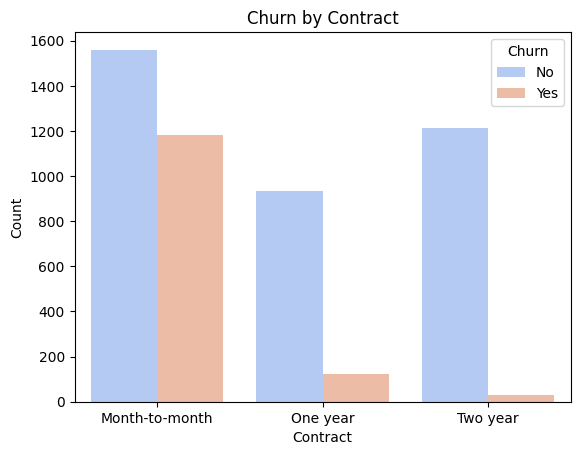

In [103]:
# Grouping by Contract and Churn, then counting occurrences
Churn_by_contract = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')

# Plotting stacked bar plot with Seaborn
sns.barplot(data=Churn_by_contract, x='Contract', y='Count', hue='Churn', palette='coolwarm')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Churn by Contract')
plt.show()


- Indicates that customers on longer-term contracts (two years) are associated with lower churn rates.

##### **Multivariate Analysis**

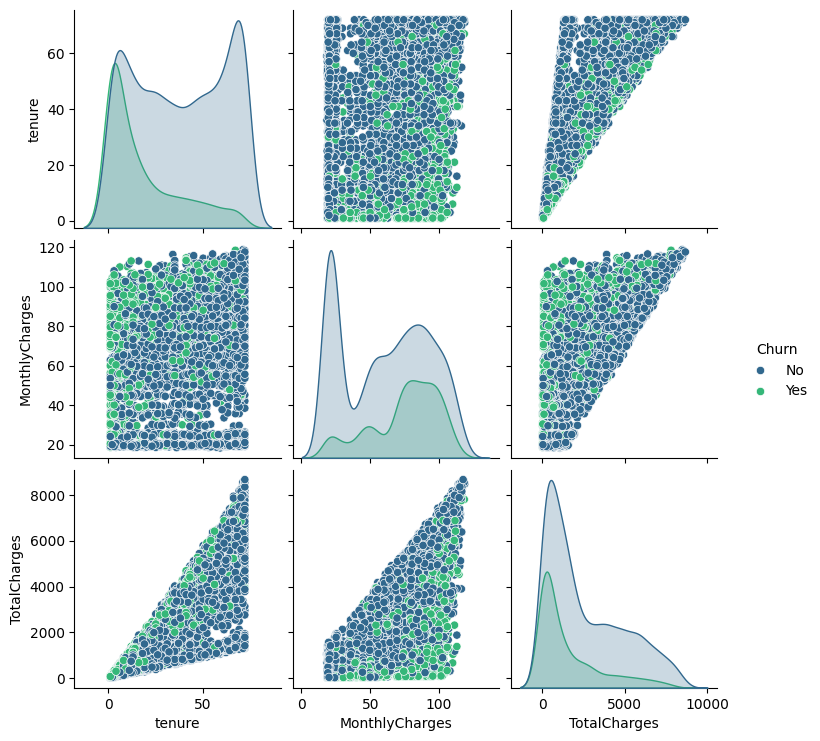

In [104]:
# Subsetting the DataFrame for the variables of interest
vars = df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']]

# Plotting pair plot with Seaborn
sns.pairplot(vars.dropna(), hue='Churn', palette='viridis')
plt.show()

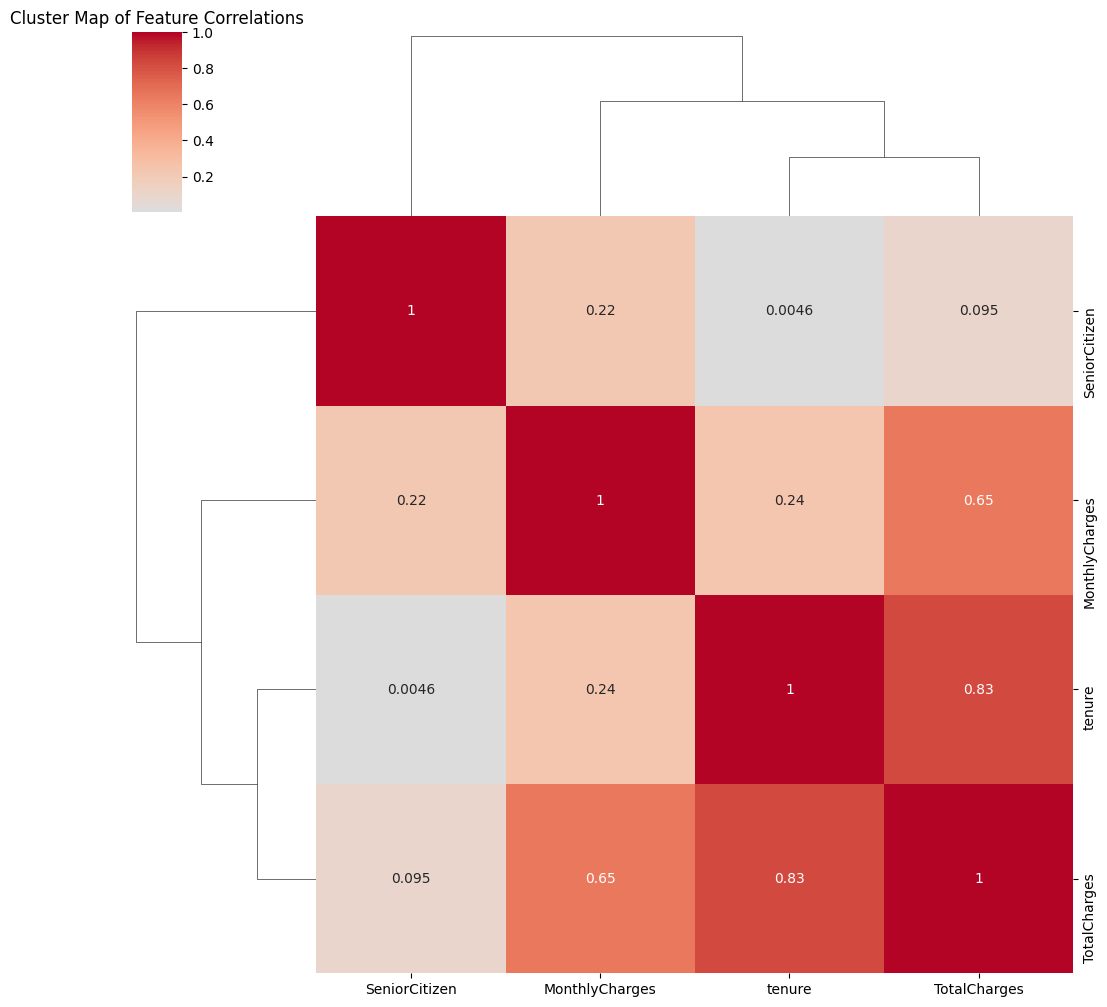

In [105]:
#A cluster map provides a hierarchical clustering of features which can help in identifying groups of related features.
# Plotting cluster map
sns.clustermap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Map of Feature Correlations')
plt.show()


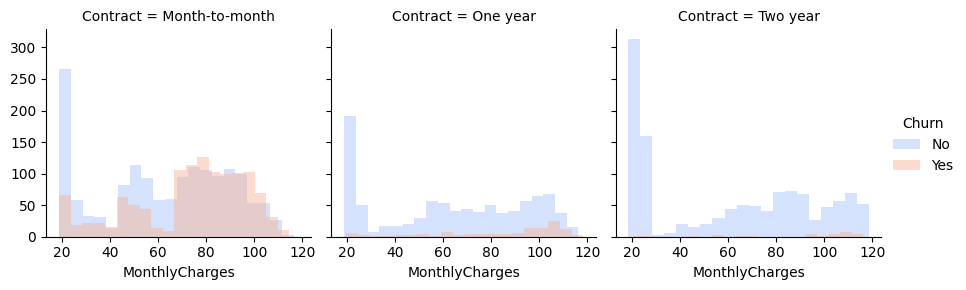

In [106]:

# Plotting Facet Grid with Seaborn
g = sns.FacetGrid(df, col="Contract", hue="Churn", palette="coolwarm", col_wrap=3)
g.map(plt.hist, 'MonthlyCharges', bins=20, alpha=.5)
g.add_legend()
plt.show()


- Tenure:

Non-churners (blue) have a more uniform distribution across different tenures.
Churners (green) are more likely to have shorter tenures.
MonthlyCharges:

Non-churners (blue) are more evenly distributed across the range of monthly charges, with a slight concentration at the lower end.
Churners (green) have a noticeable peak at higher monthly charges, indicating that customers with higher monthly charges are more likely to churn.
TotalCharges:

Non-churners (blue) have a wider distribution of total charges.
Churners (green) tend to have lower total charges, likely due to shorter tenures.
- Tenure: Shorter tenure is associated with higher churn.
MonthlyCharges: Higher monthly charges are associated with higher churn.
TotalCharges: Lower total charges are associated with higher churn, likely due to the shorter tenure of these customers.

##### **Hypothesis Testing**

- Null hypothesis: There is no significant difference between Tenure and the likelihood of customer churn.


In [107]:
# Convert 'churn' column to numeric using label encoding
df['churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Calculate the median tenure
median_tenure = df['tenure'].median()

# Divide the dataset into two groups based on median tenure
short_tenure = df[df['tenure'] <= median_tenure]['churn_numeric']
long_tenure = df[df['tenure'] > median_tenure]['churn_numeric']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(short_tenure, long_tenure)

# Print the test statistic (U statistic) and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject Null Hypothesis: There is no significant difference between Tenure and the likelihood of customer churn.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between Tenure and the likelihood of customer churn.")




Mann-Whitney U statistic: nan
P-value: nan
Fail to Reject Null Hypothesis: There is no significant difference between Tenure and the likelihood of customer churn.


##### **Analytical Questions**
- What is the overall churn rate for the company? What is the average tenure of customers who churned compared to those who stayed?
- How does the churn rate vary month by month?
- How do different factors (  senior citizen,payment method,OnlineSecurity etc.) influence the likelihood of customer churn?
- What is the financial impact of customer churn on the company’s revenue?



In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

**What is the overall churn rate for the company? What is the average tenure of customers who churned compared to those who stayed?**

Overall churn rate: 26.50%


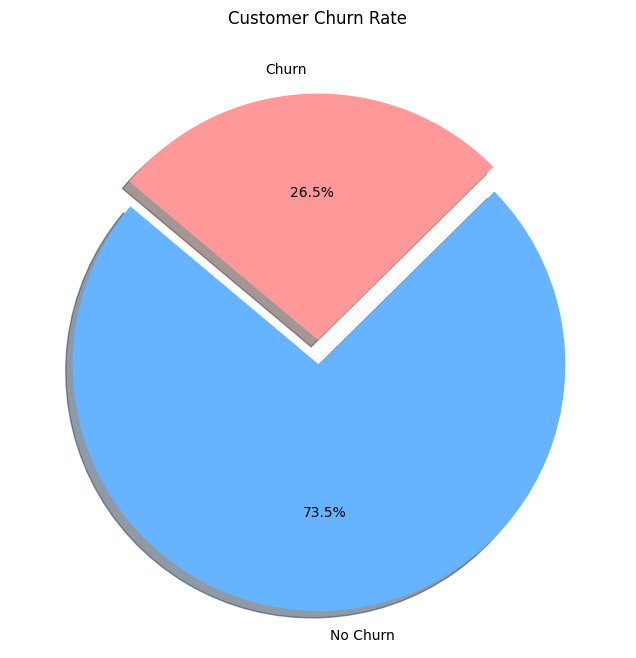

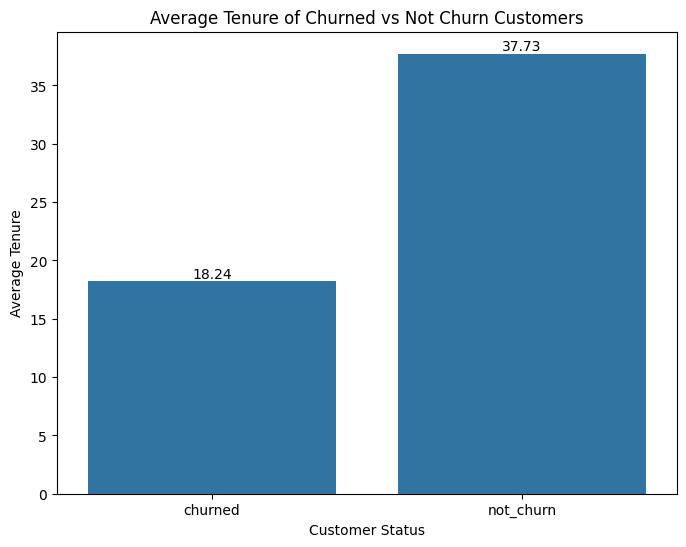


Average tenure of churned customers: 18.24months
Average tenure of not churn customers: 37.73months


In [109]:

churn_counts = df['Churn'].value_counts()
#calculate the number of customer that churned
churned = df.loc[df['Churn'] == 'Yes'].count()[0]

# calculate the number of customer that did not churn
not_churn = df.loc[df['Churn'] == 'No'].count()[0]

#add to get total number of customers
total_counts = churned + not_churn

# calculate the churn rate
churn_rate = (churned / total_counts) * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

# Visualize the churn rate on a pie chart
labels = ['No Churn', 'Churn']
sizes = [not_churn, churned]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the 1st slice (No Churn)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Customer Churn Rate')
plt.show()




#checking the average tenure of churned customers
# Filter the DataFrame to only include rows where churn is 'Yes'
churned_customers = df[df['Churn'] == 'Yes']
stayed_customers = df[df['Churn'] == 'No']
# Calculate the average tenure for each group
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_stayed = stayed_customers['tenure'].mean()
#plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['churned', 'not_churn'], y=[avg_tenure_churned, avg_tenure_stayed])
plt.title('Average Tenure of Churned vs Not Churn Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Tenure')

# Adding data labels
for index, value in enumerate([avg_tenure_churned, avg_tenure_stayed]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

print()
print(f'Average tenure of churned customers: {avg_tenure_churned:.2f}months')
print(f'Average tenure of not churn customers: {avg_tenure_stayed:.2f}months')

**How does the churn rate vary month by month?**

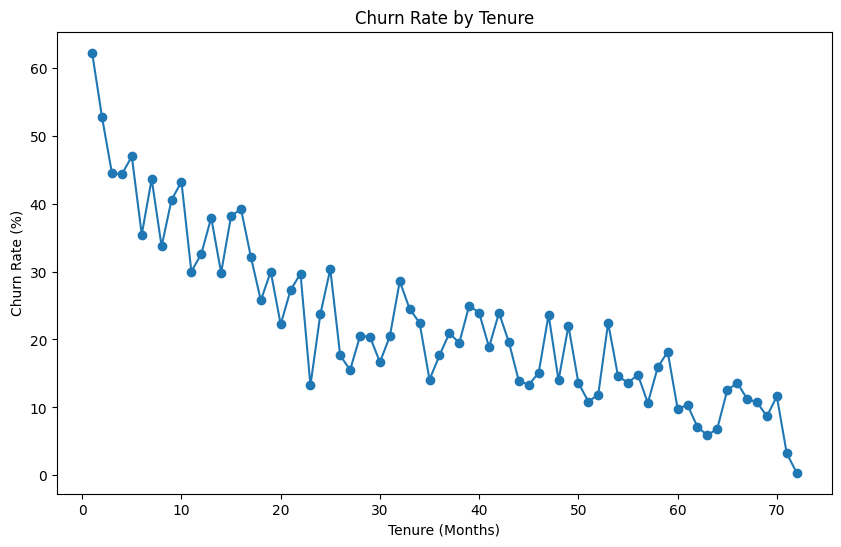

In [110]:


# Filter the DataFrame to only include rows where churn is 'Yes'
df_churn_yes = df[df['Churn'] == 'Yes']

# Group by tenure and calculate the count of churned customers for each tenure
churn_counts = df_churn_yes.groupby('tenure').size().reset_index(name='churned_customers')

# Calculate total customers for each tenure
total_customers = df.groupby('tenure').size().reset_index(name='total_customers')

# Merge the churned customers with the total customers
churn_data = pd.merge(churn_counts, total_customers, on='tenure')

# Calculate the churn rate for each tenure
churn_data['churn_rate'] = (churn_data['churned_customers'] / churn_data['total_customers']) * 100

# Plot the churn rate by tenure
plt.figure(figsize=(10, 6))
plt.plot(churn_data['tenure'], churn_data['churn_rate'], marker='o')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(False)
plt.show()







**How does the churn rate vary by customer demographics (e.g., partner, dependents, gender,seniorCitizen)?**

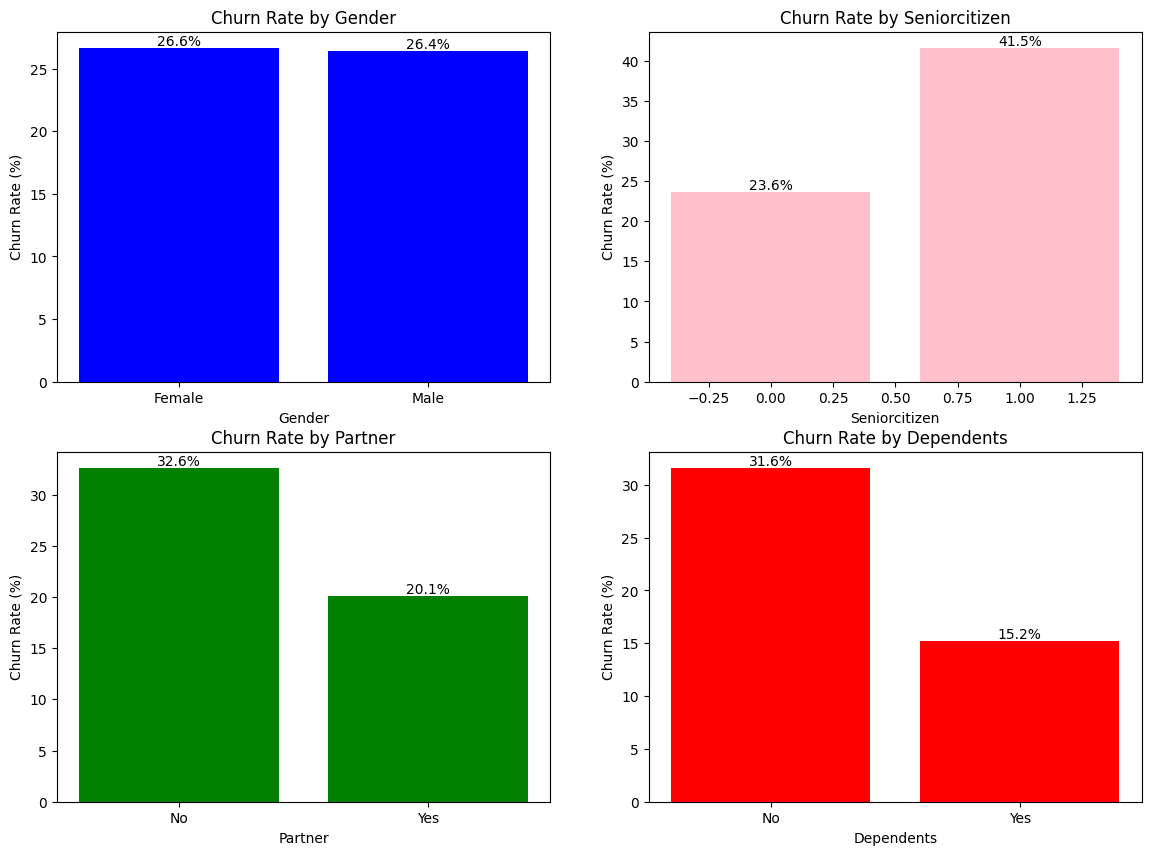

In [111]:

# Function to calculate churn rate
def calculate_churn_rate(group):
    churned_customers = group[group['Churn'] == 'Yes'].shape[0]
    total_customers = group.shape[0]
    churn_rate = (churned_customers / total_customers) * 100
    return churn_rate


# Calculate churn rate by different demographics
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
churn_rates = {}

for demographic in demographics:
    churn_rates[demographic] = df.groupby(demographic).apply(calculate_churn_rate).reset_index(name='churn_rate')

# Plot churn rates
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, demographic in enumerate(demographics):
    bars = axes[i // 2, i % 2].bar(churn_rates[demographic][demographic], churn_rates[demographic]['churn_rate'], color=['blue', 'pink', 'green', 'red'][i])
    axes[i // 2, i % 2].set_title(f'Churn Rate by {demographic.capitalize()}')
    axes[i // 2, i % 2].set_xlabel(demographic.capitalize())
    axes[i // 2, i % 2].set_ylabel('Churn Rate (%)')
    for bar in bars:
        height = bar.get_height()
        axes[i // 2, i % 2].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


- What is the financial impact of customer churn on the company’s revenue?

Total Lost Revenue due to Churn: $2092874.25
Average Revenue per Churned Customer: $1566.52


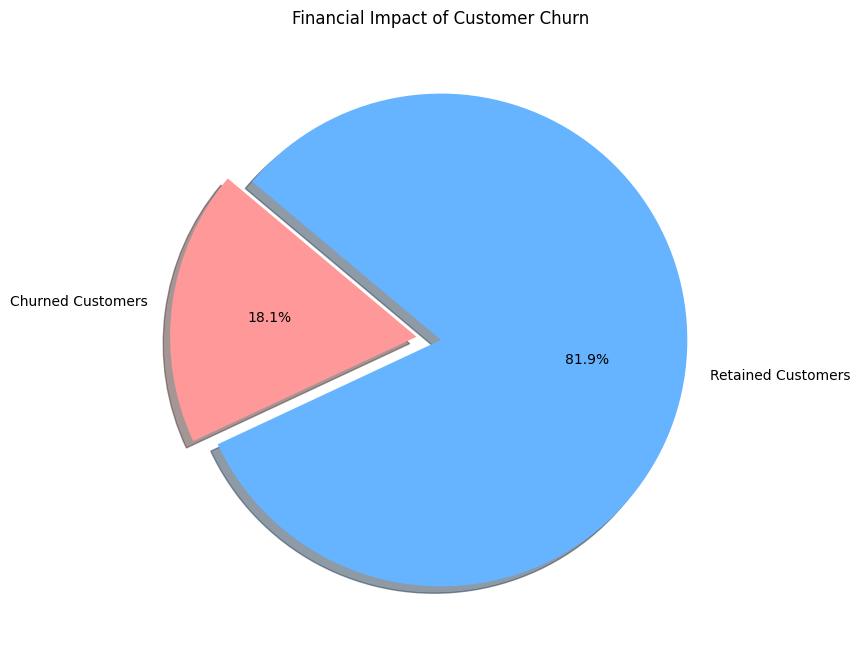

In [112]:


# Filter the DataFrame to only include rows where churn is 'Yes'
df_churned = df[df['Churn'] == 'Yes']

# Calculate the total and average TotalCharges for churned customers
total_lost_revenue = df_churned['TotalCharges'].sum()
average_lost_revenue = df_churned['TotalCharges'].mean()

# Print the financial impact
print(f"Total Lost Revenue due to Churn: ${total_lost_revenue:.2f}")
print(f"Average Revenue per Churned Customer: ${average_lost_revenue:.2f}")

# Visualize the financial impact
labels = ['Churned Customers', 'Retained Customers']
sizes = [total_lost_revenue, df[df['Churn'] == 'No']['TotalCharges'].sum()]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Churned Customers)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Financial Impact of Customer Churn')
plt.show()


### Data Preparation

In [113]:
df.drop('customerID',axis = 1,inplace =True)


In [114]:
# Drop rows with None or NaN values in the churn column
df.dropna(subset=['Churn'],inplace = True)

In [115]:
df.drop('churn_numeric',axis = 1,inplace =True)

In [116]:
# Check if DataFrame is not None
if df is not None:
    # Inspect column names
    print("Column names:")
    print(df.columns)

Column names:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


**Split Data into X and y**

In [117]:
#select the input data
X = df.drop('Churn',axis =1)
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [118]:
y = df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

**Split the data into numerical and categorical columns**

In [119]:
#split data into numeric and categorical columns
numeric_cols = X.select_dtypes('number').columns
numeric_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [120]:
#select categorical columns
categorical_cols = X.select_dtypes('object').columns
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [121]:
#save data to csv
churn_data = df.to_csv('churn_data.csv')

**Split data set into training and evaluation**

In [122]:

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [123]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
454,Female,True,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.550000,69.550000
1023,Female,True,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.600000,967.900000
1460,Male,False,No,No,5,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,85.300003,424.149994
2322,Female,False,No,Yes,49,Yes,No,No,None,None,None,None,None,None,Two year,No,Credit card (automatic),20.450001,1024.650024
2349,Male,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),90.449997,6565.850098


##### Feature Engineering

**Encoding**

In [124]:
'''Label encoder --  categorical labels into numerical labels. Each unique category in the column is assigned an integer value
(Change the product category from class to numbers)'''
#instantiate a class 
encoder = LabelEncoder()

#fit and transform the training and test data
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [125]:
X.select_dtypes('number').skew()

tenure            0.225416
MonthlyCharges   -0.238663
TotalCharges      0.944216
dtype: float64

In [126]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5042.0,32.568822,24.525954,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.400000,35.762500,70.550003,90.050002,118.650002
TotalCharges,5034.0,2300.954758,2268.346402,18.799999,417.662498,1401.000000,3860.599976,8670.100000


**Pipeline Creation**



In [127]:

#standardization is changing the mean to 1 with a std of 0
# Create a Data Preprocessing Pipeline for all  numeric data
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('Quantile-transformer', QuantileTransformer(output_distribution='normal')),
    
])

# Create a Data Pre Processing Pipeline for all your categorical Data
cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
])

# Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', num_pipeline,numeric_cols),
    ('categorical_pipeline', cat_pipeline, categorical_cols)
])

### Modeling and Evaluation

In [128]:

# Instantiate models
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('XGB',XGBClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=15)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('Random_Forest', RandomForestClassifier(random_state=42)),
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42))
]

**Unbalanced data training**

In [129]:

# Initialize storage dictionaries and metrics table
#unbalanced data pipeline storage dictionary
unbalanced_pipelines = {}
confusion_matrices = {}
unbalanced_metrics = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC_AUC','Log loss'])

# Iterate over each model, classifier
for model_name, classifier in models:
    # Create a pipeline
    new_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    # Fit data to new pipeline
    new_pipeline.fit(X_train, y_train_encoded)

     # Store the trained pipeline
    unbalanced_pipelines[model_name] = new_pipeline
    
    # make Prediction on test data
    y_pred = new_pipeline.predict(X_test)
    y_pred_proba = new_pipeline.predict_proba(X_test)[:, 1]


    # Calculate the confusion matrix
    cm_unbalanced = confusion_matrix(y_test_encoded, y_pred)
    confusion_matrices[model_name] = cm_unbalanced                           

    # Generate the classification report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    # print(unbalanced_metrics)
    # Extract metrics of interest
    Accuracy = metrics['accuracy']
    Precision = metrics['weighted avg']['precision']
    Recall = metrics['weighted avg']['recall']
    F1_Score = metrics['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
    logloss = log_loss(y_test_encoded, y_pred_proba)


    # Add metrics to the table
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, Accuracy, Precision, Recall, F1_Score,roc_auc,logloss]

# Sort the metrics table by F1 score in descending order
unbalanced_metrics = unbalanced_metrics.sort_values(by='F1_Score', ascending=False, ignore_index=True)
    
print(unbalanced_metrics)
   

            Model_Name  Accuracy  Precision    Recall  F1_Score   ROC_AUC  \
0    Gradient_Boosting  0.807730   0.801111  0.807730  0.803346  0.856406   
1  Logistic_Regression  0.805748   0.799688  0.805748  0.801892  0.857638   
2                  KNN  0.795837   0.793482  0.795837  0.794573  0.838318   
3        Random_Forest  0.785927   0.774043  0.785927  0.776910  0.834015   
4                  XGB  0.777007   0.770806  0.777007  0.773378  0.825265   
5        Decision_Tree  0.722498   0.727907  0.722498  0.725022  0.656077   

   Log loss  
0  0.402653  
1  0.400523  
2  0.519650  
3  0.497251  
4  0.479064  
5  9.932133  


**Model analysis and insights**
- Gradient Boosting is the best-performing model based on the metrics provided, followed closely by Logistic Regression and KNN.
- Decision Tree has the lowest performance 
- Given the unbalanced nature of many real-world datasets, the F1 Score is a more reliable metric than accuracy. The Gradient Boosting model's high F1 Score indicates it performs well even with class imbalance.

- Conclusion
The Gradient Boosting model, with  precision of 0.801757 indicating that out of all the instances predicted as positive, approximately 80.18% were actually positive. High precision indicates that the model has a low false positive rate.
A high recall of 0.807730 indicates that the model has a low false negative rate. 
The F1 Score, being the harmonic mean of precision and recall, is 0.803913. This indicates a good balance between precision and recall, making it a reliable choice for applications with imbalanced datasets where both false positives and false negatives are costly. the F1 Score confirms that this performance is not due to bias towards the majority class but rather due to a genuinely balanced prediction capability.

The F1 Score is particularly high, suggesting that the model is effectively identifying positive cases while maintaining a low number of false positives and false negatives and is the best-performing model among those compared.it further confirms t that this performance is not due to bias towards the majority class but rather due to a genuinely balanced prediction capability.


**Visualizing the ROC Curves, Precision-Recall curves and confusion matrix of unbalanced data**

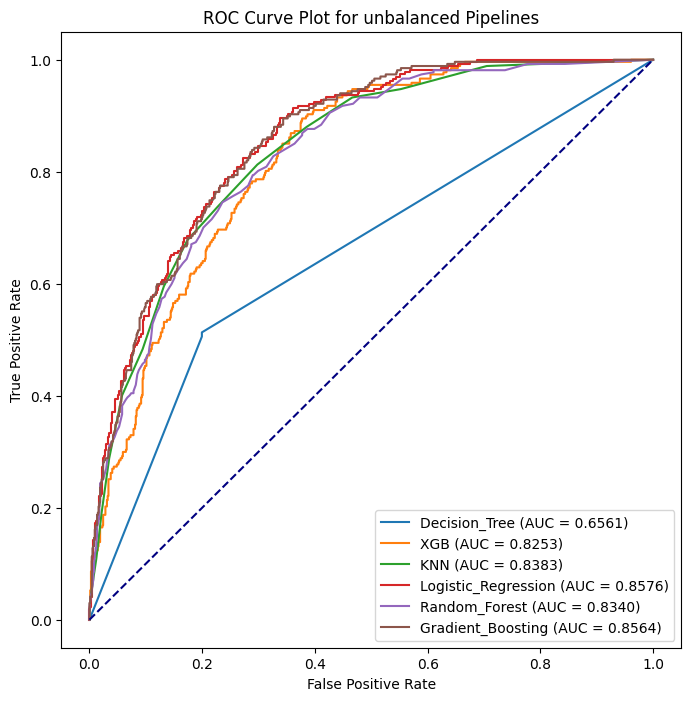

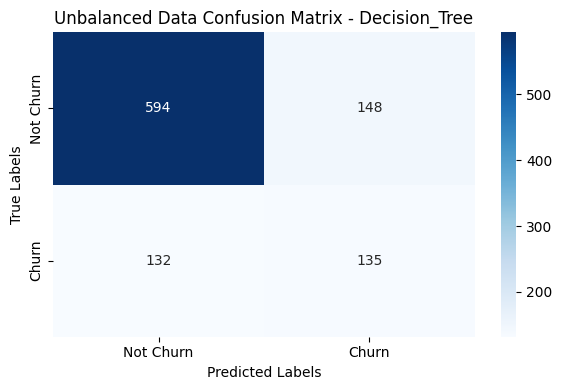

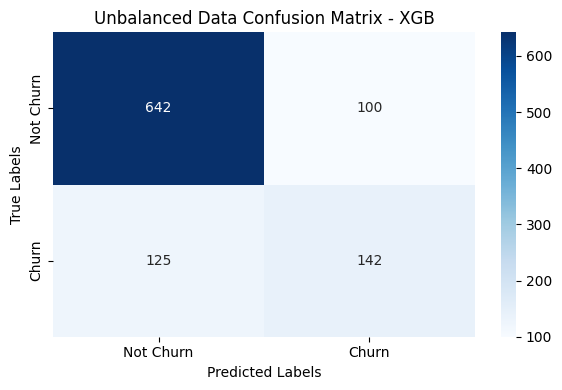

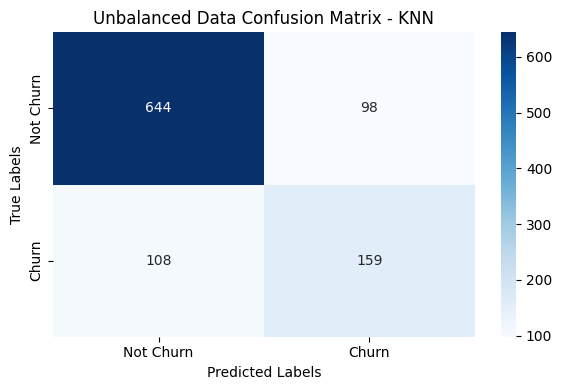

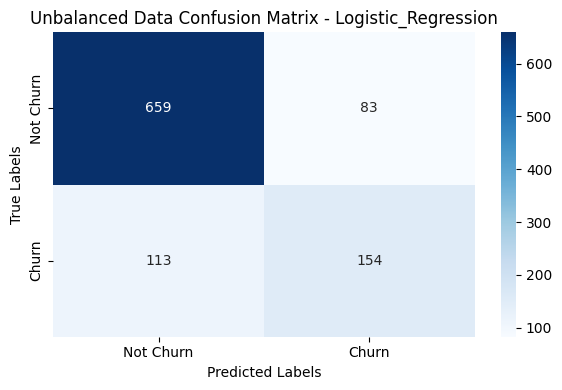

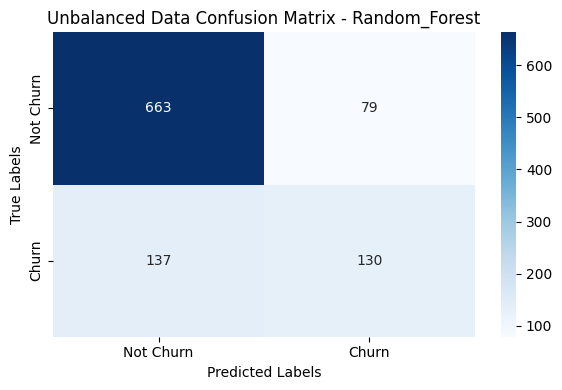

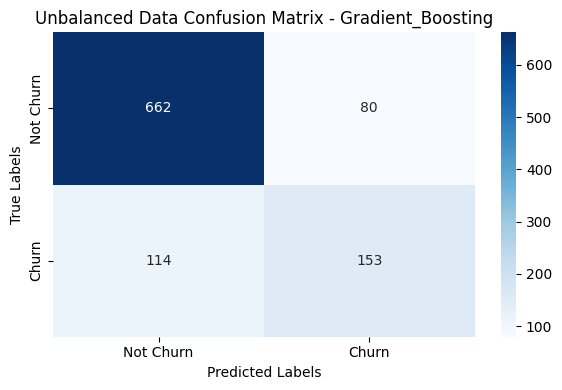

In [130]:

# Initialize the figure for the ROC curves
fig, ax = plt.subplots(figsize=(8, 8))

# Dictionary to store ROC data for each model
all_roc_df = {}  

# Loop through each model in the unbalanced_pipelines dictionary
for model_name, pipeline in unbalanced_pipelines.items():

    # Get the predicted probabilities for the positive class
    y_score_unbalanced = pipeline.predict_proba(X_test)[:, 1]

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score_unbalanced)
    roc_auc = auc(fpr, tpr)

    # Create a DataFrame to store the ROC curve data
    roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})
    all_roc_df[model_name] = roc_df  # Save the DataFrame in the dictionary

    # Plot the ROC curve for the current model
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot the diagonal line representing a random classifier
ax.plot([0, 1], [0, 1], 'k--', color='navy')
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.set_title('ROC Curve Plot for unbalanced Pipelines')
ax.legend(loc='lower right')  # Place the legend in the upper left corner
plt.show()



# Loop through each model and visualize the confusion matrix
for model_name, cm_unbalanced in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_unbalanced, annot=True, fmt='d', cmap='Blues',xticklabels =['Not Churn','Churn'],
                yticklabels=['Not Churn','Churn'] )
    plt.title(f'Unbalanced Data Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()




It's good to note that the best performing model is the model that does not predict alot of false non-churns. In essence, its better, at some degree, to predict that a customer will churn and they don't churn than to predict that a customer will not churn and they end up churning.
Again, we want a model that is balanced across all metrics. We sure dont want a model that predicts alot of customer will churn in the future whereas being a false prediction.
Therefore, in this case, the best perfoming model is GradientBoosting followed by LogisticRegression .
This are the models that we will fine tune for better performance

In [131]:
# # heatmap to visualize probable prediction at the best threshold
# sns.heatmap(gradient_threshold_matrix, annot=True, fmt='.1f', cmap='crest', cbar=False)
# plt.title('Gradient Classifier Best Threshold Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

**Train on balanced data**

In [132]:

# Initialize storage dictionaries and metrics table
balanced_pipelines = {}
confusion_matrices = {}
balanced_metrics_df = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1_Score','roc_auc','logloss'])

# Iterate over each model, classifier
for model_name, classifier in models:
    # Create a pipeline
    new_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)), 
        ('classifier', classifier)
    ])
    # Fit data to new pipeline
    new_pipeline.fit(X_train, y_train_encoded)

     # Store the trained pipeline
    balanced_pipelines[model_name] = new_pipeline
    
    # make Prediction on test data
    y_pred = new_pipeline.predict(X_test)
    y_pred_proba = new_pipeline.predict_proba(X_test)[:, 1]

    # Calculate the confusion matrix
    cm_balanced = confusion_matrix(y_test_encoded, y_pred)
    confusion_matrices[model_name] = cm_balanced                           

    # Generate the classification report
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract metrics of interest
    Accuracy = balanced_metrics['accuracy']
    Precision = balanced_metrics['weighted avg']['precision']
    Recall = balanced_metrics['weighted avg']['recall']
    F1_Score = balanced_metrics['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
    logloss = log_loss(y_test_encoded, y_pred_proba)

    # Add metrics to the table
    balanced_metrics_df.loc[len(balanced_metrics_df)] = [model_name, Accuracy, Precision, Recall, F1_Score,roc_auc,logloss]

# Sort the metrics table by F1 score in descending order
balanced_metrics_df = balanced_metrics_df.sort_values(by='F1_Score', ascending=False, ignore_index=True)
    
print(balanced_metrics_df)

            Model_Name  Accuracy  Precision    Recall  F1_Score   roc_auc  \
0    Gradient_Boosting  0.784936   0.797503  0.784936  0.789740  0.856219   
1        Random_Forest  0.776016   0.774432  0.776016  0.775194  0.827259   
2                  XGB  0.773043   0.772771  0.773043  0.772906  0.824810   
3  Logistic_Regression  0.754212   0.811848  0.754212  0.767267  0.855881   
4                  KNN  0.709613   0.802516  0.709613  0.726655  0.830027   
5        Decision_Tree  0.719524   0.729552  0.719524  0.723953  0.658530   

     logloss  
0   0.426440  
1   0.527518  
2   0.487441  
3   0.477595  
4   0.850959  
5  10.074334  


**Visualizing the ROC Curves, Precision-Recall curves and confusion matrix of balanced data**

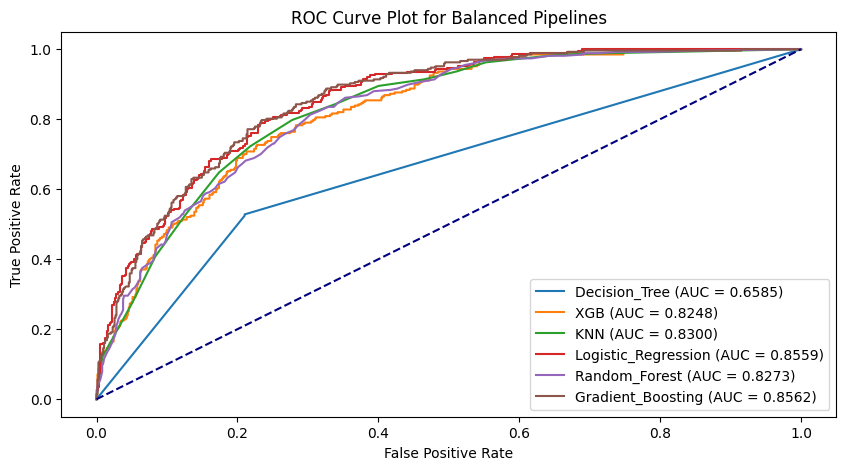

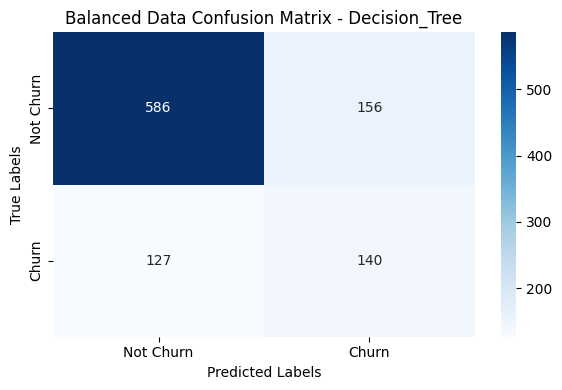

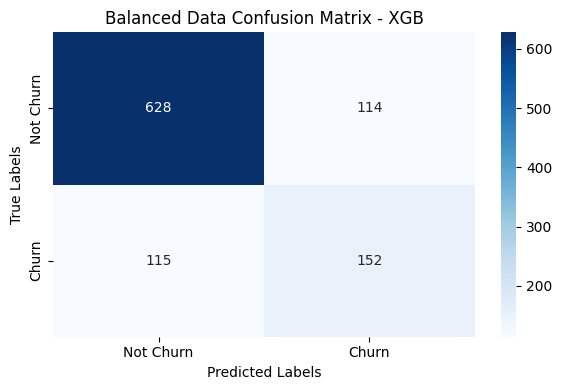

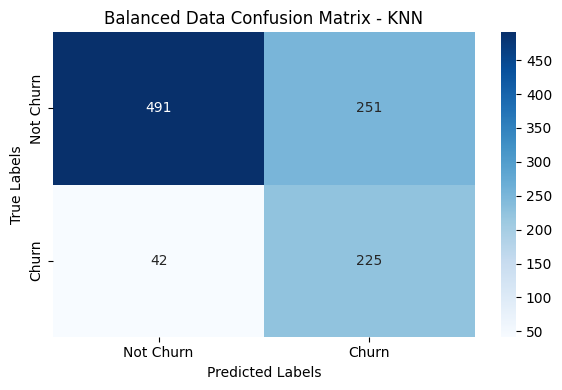

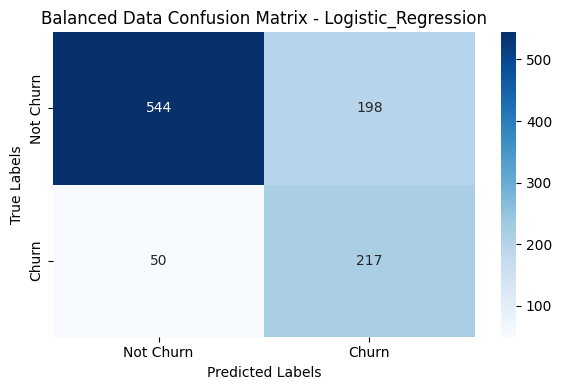

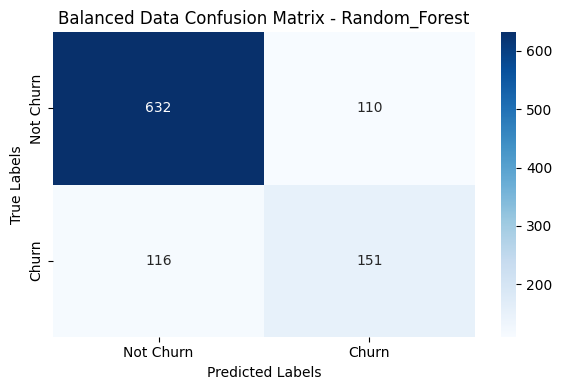

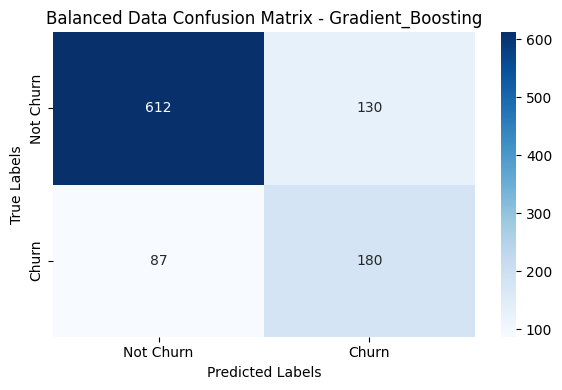

In [133]:
# Initialize the figure for the ROC curves
fig, ax = plt.subplots(figsize=(10, 5))

# Dictionary to store ROC data for each model
bal_roc_df = {}

# Loop through each model in the balanced_pipelines dictionary
for model_name, pipeline in balanced_pipelines.items():
    # Get the predicted probabilities for the positive class
    y_score_balanced = pipeline.predict_proba(X_test)[:, 1]

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score_balanced)
    roc_auc = auc(fpr, tpr)

    # Create a DataFrame to store the ROC curve data
    roc_da = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})
    bal_roc_df[model_name] = roc_da  # Save the DataFrame in the dictionary

    # Plot the ROC curve for the current model
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot the diagonal line representing a random classifier
ax.plot([0, 1], [0, 1], 'k--', color='navy')
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
ax.set_title('ROC Curve Plot for Balanced Pipelines')
ax.legend(loc='lower right')  # Place the legend in the lower right corner
plt.show()

# Loop through each model and visualize the confusion matrix
for model_name, cm_balanced in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'],
                yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Balanced Data Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()

**Insights**



- To determine whether to use balanced or unbalanced data for predicting customer churn, let's consider the primary goal: accurately predicting if a customer will churn.
Key Considerations for Churn Prediction:
Imbalance in Churn Data:

Churn datasets are often imbalanced because fewer customers churn compared to those who stay.
Imbalanced data can lead to models that are biased towards the majority class (non-churn).
Evaluation Metrics:

Precision: The proportion of true positive churn predictions out of all churn predictions made by the model.
Recall: The proportion of actual churns correctly identified by the model.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
ROC AUC: Measures the model's ability to distinguish between classes.
Log Loss: Indicates the model's confidence in its predictions.
Balanced vs. Unbalanced Data:
Balanced Data:

Pros: Helps the model to better learn and identify minority class (churn).
Cons: Can lead to over-sampling the minority class and under-sampling the majority class, potentially causing the model to overfit or underfit.
Unbalanced Data:

Pros: Reflects the real-world distribution of the data, preventing overfitting due to artificial data balancing.
Cons: The model might become biased towards the majority class, making it less effective in predicting churn accurately.
Analysis of Results:
Gradient Boosting on Balanced Data:

Accuracy: 0.787909
Precision: 0.801342
Recall: 0.787909
F1 Score: 0.792927
ROC AUC: 0.858700
Log Loss: 0.422160
Gradient Boosting on Unbalanced Data:

Accuracy: 0.807730
Precision: 0.801757
Recall: 0.807730
F1 Score: 0.803913
ROC AUC: 0.856885
Log Loss: 0.402286
Recommendation:
Balanced Data: If your primary goal is to maximize recall (i.e., correctly identifying as many churns as possible), balancing the data is typically a better choice. This ensures the model pays more attention to the minority class (churn) and improves recall.
Unbalanced Data: If you are concerned with the model's overall performance in a real-world scenario where data is naturally imbalanced, unbalanced data might be more appropriate. This prevents potential overfitting and ensures the model generalizes well.
In the context of predicting customer churn, recall is often more critical than precision. Missing a churn prediction can be more costly than predicting a churn that doesn't happen (false positive). Therefore, using balanced data might be more effective to ensure the model correctly identifies customers who are at risk of churning.

Conclusion:
Balanced data is generally better for predicting customer churn because it enhances the model's ability to identify churners, improving recall and ensuring the minority class (churn) is adequately represented. This is crucial for businesses looking to retain customers and minimize churn.


Conclusion:
Gradient Boosting outperforms Logistic Regression and other models in terms of F1 Score, ROC AUC, and Log Loss, making it the best performing model for balanced data.

Gradient Boosting achieves a higher F1 Score (0.792927) and ROC AUC (0.858700), indicating better overall performance in identifying churn while maintaining a good balance between precision and recall.

Gradient Boosting also has a lower Log Loss (0.422160) compared to Logistic Regression (0.482413), showing that it makes more confident and accurate predictions.

Recommendation:
Given the balanced data and the goal of predicting customer churn, Gradient Boosting is the better-performing model and should be chosen for this task. It provides a good balance between accuracy, precision, recall, and overall predictive power.







In [134]:
#select the top 2 models

# Select the top 2 models
Best_models = balanced_metrics_df.head(2)

# Print the top 2 models' metrics
print("Top 2 Models:")
print(Best_models)

# Retrieve and print the top 2 pipelines and confusion matrices
Best_models = Best_models['Model_Name'].tolist()
top_2_pipelines = {name: balanced_pipelines[name] for name in Best_models}
top_2_confusion_matrices = {name: confusion_matrices[name] for name in Best_models}
print(f'confusion matrices:')
print(top_2_confusion_matrices)

Top 2 Models:
          Model_Name  Accuracy  Precision    Recall  F1_Score   roc_auc  \
0  Gradient_Boosting  0.784936   0.797503  0.784936  0.789740  0.856219   
1      Random_Forest  0.776016   0.774432  0.776016  0.775194  0.827259   

    logloss  
0  0.426440  
1  0.527518  
confusion matrices:
{'Gradient_Boosting': array([[612, 130],
       [ 87, 180]], dtype=int64), 'Random_Forest': array([[632, 110],
       [116, 151]], dtype=int64)}


**Adding thresholds to top 2 pipelines**

- Gradient boosting with threshold

In [135]:
gbc_pipeline= balanced_pipelines['Gradient_Boosting']
# Preview of the best perfoming thresholds for Logistic Regression
bal_roc_df['Gradient_Boosting'].loc[300:,]

,False Positive Rate,True Positive Rate,Threshold
300,0.915094,0.996255,0.017293
301,0.915094,1.000000,0.017285
302,0.938005,1.000000,0.016067
303,0.940701,1.000000,0.016058
304,0.951482,1.000000,0.015103
305,0.954178,1.000000,0.015076
306,0.962264,1.000000,0.014659
307,0.967655,1.000000,0.014510
308,0.982480,1.000000,0.013170
309,0.985175,1.000000,0.013143


Classification report for Gradient Boosting with threshold 0.09075:
              precision    recall  f1-score      support
0              0.976261  0.443396  0.609824   742.000000
1              0.385417  0.970037  0.551651   267.000000
accuracy       0.582755  0.582755  0.582755     0.582755
macro avg      0.680839  0.706717  0.580737  1009.000000
weighted avg   0.819913  0.582755  0.594430  1009.000000


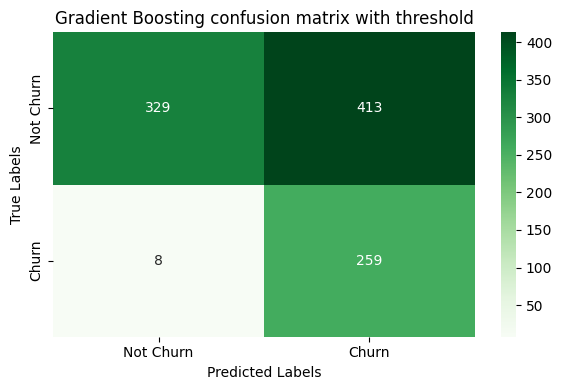

In [136]:


# Best threshold
gbc_threshold = 0.090750


# Predict probabilities
y_pred_proba_gb = gbc_pipeline.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba_gb > gbc_threshold).astype(int)

# Compute confusion matrix
gbc_threshold_matrix = confusion_matrix(y_test_encoded, predictions)

# Generate the classification report
report_gbc = classification_report(y_test_encoded, predictions, output_dict=True)
print(f'Classification report for Gradient Boosting with threshold {gbc_threshold}:')
print(pd.DataFrame(report_gbc).transpose())

# Saving the best model and threshold in variables
best_gbc_boosting_model = gbc_pipeline
best_gbc_threshold = gbc_threshold

# Create a dictionary to store the model and threshold
best_gbc_model_and_threshold = {
    'model': gbc_pipeline,
    'threshold': gbc_threshold
}

#plotting
plt.figure(figsize=(6, 4))
sns.heatmap(gbc_threshold_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title(f'Gradient Boosting confusion matrix with threshold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

- Random Forest with threshold

In [137]:
rf_pipeline= balanced_pipelines['Random_Forest']
# Preview of the best perfoming thresholds for Logistic Regression
bal_roc_df['Random_Forest'].tail(50)

,False Positive Rate,True Positive Rate,Threshold
55,0.168464,0.602996,0.4700
56,0.172507,0.614232,0.4600
57,0.181941,0.621723,0.4500
58,0.185984,0.632959,0.4400
59,0.196765,0.647940,0.4300
60,0.200809,0.662921,0.4200
61,0.207547,0.674157,0.4100
62,0.211590,0.681648,0.4000
63,0.223720,0.689139,0.3900
64,0.233154,0.700375,0.3800


Classification report for Random Forest with threshold 0.37:
              precision    recall  f1-score      support
0              0.876733  0.766846  0.818116   742.000000
1              0.519444  0.700375  0.596491   267.000000
accuracy       0.749257  0.749257  0.749257     0.749257
macro avg      0.698089  0.733610  0.707304  1009.000000
weighted avg   0.782188  0.749257  0.759470  1009.000000
[[569 173]
 [ 80 187]]


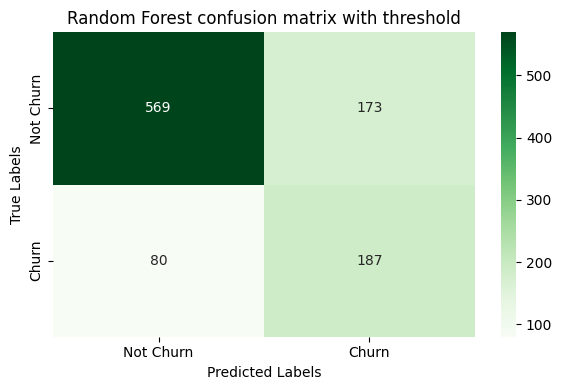

In [138]:


# Best threshold
rf_threshold = 0.37


# Predict probabilities
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba_rf > rf_threshold).astype(int)

# Compute confusion matrix
rf_threshold_matrix = confusion_matrix(y_test_encoded, predictions)

# Generate the classification report
report = classification_report(y_test_encoded, predictions, output_dict=True)
print(f'Classification report for Random Forest with threshold {rf_threshold}:')
print(pd.DataFrame(report).transpose())

# Saving the best model and threshold in variables
# Create a dictionary to store the model and threshold
best_rf_model_and_threshold = {
    'model': rf_pipeline,
    'threshold': rf_threshold
}
best_rf_model = rf_pipeline
best_rf_threshold = rf_threshold
print(rf_threshold_matrix)

#plotting
plt.figure(figsize=(6, 4))
sns.heatmap(rf_threshold_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title(f'Random Forest confusion matrix with threshold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

**Feature Selection and Importance**

Selected features for Gradient_Boosting:
['numerical_pipeline__tenure'
 'categorical_pipeline__InternetService_Fiber optic'
 'categorical_pipeline__InternetService_No'
 'categorical_pipeline__OnlineSecurity_No'
 'categorical_pipeline__OnlineBackup_No'
 'categorical_pipeline__DeviceProtection_No'
 'categorical_pipeline__TechSupport_No'
 'categorical_pipeline__Contract_Month-to-month'
 'categorical_pipeline__Contract_Two year'
 'categorical_pipeline__PaymentMethod_Electronic check']
Selected features for Random Forest:
['numerical_pipeline__tenure'
 'categorical_pipeline__InternetService_Fiber optic'
 'categorical_pipeline__InternetService_No'
 'categorical_pipeline__OnlineSecurity_No'
 'categorical_pipeline__OnlineBackup_No'
 'categorical_pipeline__DeviceProtection_No'
 'categorical_pipeline__TechSupport_No'
 'categorical_pipeline__Contract_Month-to-month'
 'categorical_pipeline__Contract_Two year'
 'categorical_pipeline__PaymentMethod_Electronic check']


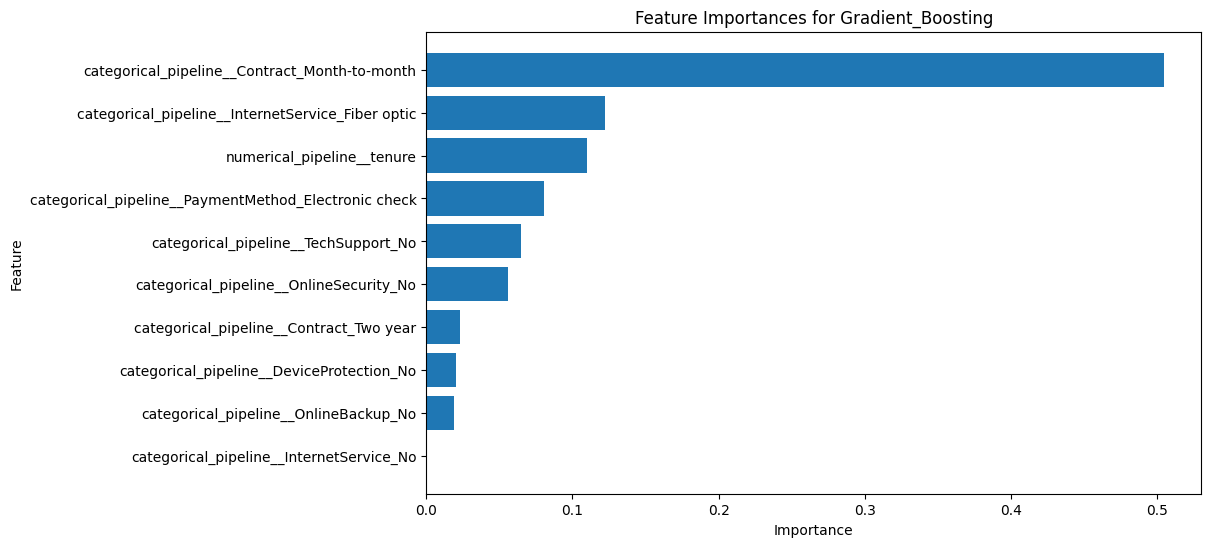

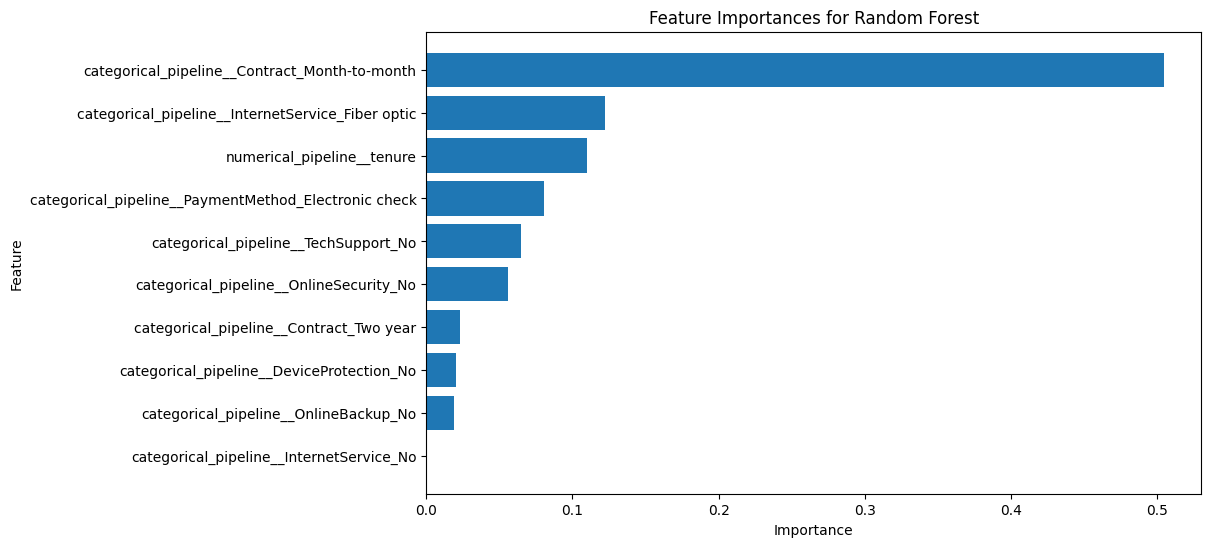

In [139]:

# the best models are random forest and Gradient Boosting from previous steps
best_models = {
    'Gradient_Boosting': GradientBoostingClassifier(random_state=42, n_estimators=300, learning_rate=0.01, max_depth=4),
    'Random Forest' : RandomForestClassifier(max_depth=10, min_samples_leaf= 1,min_samples_split= 5, n_estimators= 300)
    }

# Initialize storage for selected features and feature importances
selected_features = {}
feature_importances = {}

# Perform SelectKBest for feature selection
for model_name, classifier in best_models.items():
    # Create a pipeline with preprocessor, SMOTE, and SelectKBest
    final_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('selectkbest', SelectKBest(score_func=f_classif, k=10)),  # Select the top 10 features
        ('classifier', classifier)
    ])
    
    # Fit the pipeline
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Get selected features
    feature_names = final_pipeline.named_steps['preprocessor'].get_feature_names_out()
    mask = final_pipeline.named_steps['selectkbest'].get_support()
    selected_feature_names = feature_names[mask]
    selected_features[model_name] = selected_feature_names

    print(f"Selected features for {model_name}:")
    print(selected_feature_names)

# Fit the models on the selected features and extract feature importances
for model_name, classifier in best_models.items():
    # Create a pipeline with SMOTE and selected features
    final_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('selectkbest', SelectKBest(score_func=f_classif, k=10)),  # Select the top 10 features
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    final_pipeline.fit(X_train, y_train_encoded)
    
    # Get feature importances
    if model_name == 'Logistic_Regression':
        # Coefficients for Logistic Regression
        importances = np.abs(final_pipeline.named_steps['classifier'].coef_[0])
    elif model_name == 'Gradient_Boosting':
        # Feature importances for Gradient Boosting
        importances = final_pipeline.named_steps['classifier'].feature_importances_
    
    # Store the importances
    feature_importances[model_name] = importances

    # Plot the feature importances
    feature_importance_df = pd.DataFrame({'Feature': selected_features[model_name], 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()


**Hyperparameter Tuning**

In [140]:

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5, 6]
}

# Define the Gradient Boosting model
model_name = 'Gradient_Boosting'
classifier = GradientBoostingClassifier(random_state=42)

# # Create the pipeline
# final_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', classifier)
# ])

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(
    estimator=gbc_pipeline, 
    param_grid=param_grid, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring=['f1_weighted', 'precision', 'recall', 'accuracy'],
    refit='f1_weighted',
    verbose=2, 
    n_jobs=-1
)

# Fit the GridSearchCV object 
grid_search_gb.fit(X_train, y_train_encoded)

# Store the best parameters and search history
best_params = grid_search_gb.best_params_
search_history = pd.DataFrame(grid_search_gb.cv_results_)

# Print the best hyperparameters
print(f'Best hyperparameters for {model_name}: {best_params}')



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for Gradient_Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}


**Retraining model with best parameters**

In [141]:
# Get the best estimator from the grid search
best_gbc_tuned = grid_search_gb.best_estimator_
# Make prediction with the tuned Gradient boosting
y_pred = grid_search_gb.predict(X_test)
y_pred_proba = grid_search_gb.predict_proba(X_test)[:, 1]

# Generate the classification report
report = classification_report(y_test_encoded, y_pred, output_dict=True)

# Extract metrics of interest
Accuracy = accuracy_score(y_test_encoded, y_pred)
Precision = precision_score(y_test_encoded, y_pred, average='weighted')
Recall = recall_score(y_test_encoded, y_pred, average='weighted')
F1_Score = f1_score(y_test_encoded, y_pred, average='weighted')
ROC_AUC = roc_auc_score(y_test_encoded, y_pred_proba)
Log_loss = log_loss(y_test_encoded, y_pred_proba)

# Store metrics in a DataFrame
gbc_grid_scores_df = pd.DataFrame({
    'Model_Name': [model_name],
    'Accuracy': [Accuracy],
    'Precision': [Precision],
    'Recall': [Recall],
    'F1_Score': [F1_Score],
    'ROC_AUC': [ROC_AUC],
    'Log_loss': [Log_loss]
})

# Print the classification report in a table
print(f'Classification report for {model_name}:')
print(pd.DataFrame(report).transpose())

print()
# Print the grid scores
print(gbc_grid_scores_df)



Classification report for Gradient_Boosting:
              precision    recall  f1-score      support
0              0.872191  0.836927  0.854195   742.000000
1              0.592593  0.659176  0.624113   267.000000
accuracy       0.789891  0.789891  0.789891     0.789891
macro avg      0.732392  0.748052  0.739154  1009.000000
weighted avg   0.798204  0.789891  0.793311  1009.000000

          Model_Name  Accuracy  Precision    Recall  F1_Score   ROC_AUC  \
0  Gradient_Boosting  0.789891   0.798204  0.789891  0.793311  0.854359   

   Log_loss  
0  0.419883  


[[348 394]
 [ 10 257]]


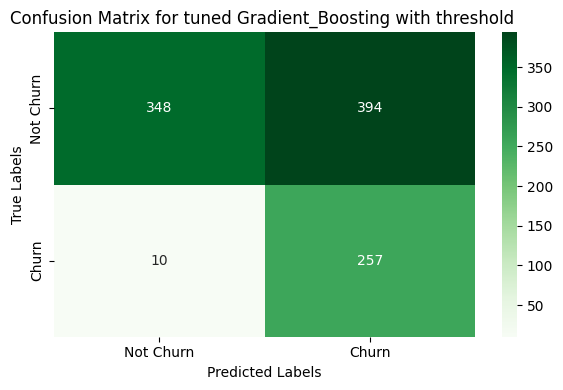

In [142]:
y_pred_proba_gb = grid_search_gb.predict_proba(X_test)[:, 1]
# Apply the specified threshold to convert probabilities to binary predictions for gbc 
gb_predictions = (y_pred_proba_gb > gbc_threshold).astype(int)

# Compute the confusion matrix
gbc_threshold_matrix = confusion_matrix(y_test_encoded, gb_predictions)
print(gbc_threshold_matrix)

#  visualize the confusion matrix of the tuned scores
plt.figure(figsize=(6, 4))
sns.heatmap(gbc_threshold_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title(f'Confusion Matrix for tuned {model_name} with threshold ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


- Based on the goal of identifying potential churners to apply a retention strategy, the best choice would be the model with the highest recall. This is because recall measures the model's ability to correctly identify all actual churners (i.e., minimizing false negatives). High recall ensures that most, if not all, potential churners are detected, allowing the retention strategy to be applied to those who are most at risk of leaving.

In [143]:
#compare between initail results and tuned results
# Print comparison
print("Grid Search Tuned Model:")
print(gbc_grid_scores_df)

print("\nOriginal Model:")
print(balanced_metrics_df.head(2))



Grid Search Tuned Model:
          Model_Name  Accuracy  Precision    Recall  F1_Score   ROC_AUC  \
0  Gradient_Boosting  0.789891   0.798204  0.789891  0.793311  0.854359   

   Log_loss  
0  0.419883  

Original Model:
          Model_Name  Accuracy  Precision    Recall  F1_Score   roc_auc  \
0  Gradient_Boosting  0.784936   0.797503  0.784936  0.789740  0.856219   
1      Random_Forest  0.776016   0.774432  0.776016  0.775194  0.827259   

    logloss  
0  0.426440  
1  0.527518  


**Final Model Comparison and selection:**
- Considerations for Model Selection:
Accuracy: Both models have similar accuracy, with Gradient Boosting slightly outperforming Random Forest.

Precision and Recall: Gradient Boosting has higher precision and recall, indicating it may be better at correctly identifying churn cases without compromising much on the precision of non-churn predictions.

F1-Score: F1-Score considers both precision and recall, giving a balanced measure of the model's performance. Gradient Boosting has a higher F1-score, indicating better overall performance across both classes.

ROC AUC: Gradient Boosting also shows a higher ROC AUC score, suggesting better discrimination between churn and non-churn classes.

Log Loss: Gradient Boosting has a slightly lower log loss, which indicates better calibration of predicted probabilities.

Conclusion:
Based on these metrics, Gradient Boosting generally performs better than Random Forest across various evaluation criteria. It shows higher precision, recall, F1-score, ROC AUC, and lower log loss. Therefore, Gradient Boosting would be the more appropriate choice for predicting customer churn in this scenario.







Business Impact Assessment and Documentation of the Model
Introduction

The objective of this model is to predict customer churn, identifying which customers are likely to leave the service. This information is critical for developing targeted retention strategies. The model chosen, Gradient Boosting with specific hyperparameters, demonstrates strong predictive performance, but understanding its business impact is essential for making informed decisions.

Key Metrics and Their Business Implications

Accuracy (80.57%):

Implication: The model is correct 80.57% of the time. While this is a solid accuracy rate, it means that 19.43% of predictions are incorrect. This impacts both the costs associated with incorrect predictions and the effectiveness of retention strategies.

Precision (66.06%):

Implication: Out of all customers predicted to churn, 66.06% actually do churn. High precision is important for resource allocation in retention campaigns. Incorrectly targeting non-churning customers (false positives) can lead to unnecessary expenses.

Recall (54.68%):

Implication: The model identifies 54.68% of all actual churners. A low recall means that a significant number of churners are not being identified (false negatives), leading to missed opportunities for retention and potentially higher customer attrition rates.

F1 Score (59.84%):

Implication: The F1 score balances precision and recall, providing a single metric that considers both false positives and false negatives. A score of 59.84% suggests that while the model is reasonably effective, there is room for improvement to ensure a balanced approach.

ROC AUC (85.80%):

Implication: This indicates the model's ability to distinguish between churners and non-churners. A high ROC AUC score means the model is good at ranking customers by their likelihood to churn, aiding in prioritizing retention efforts.

Log Loss (0.4054):

Implication: This measures the model's uncertainty in its predictions. Lower log loss values indicate more confident predictions, which can be crucial for making reliable business decisions.

Business Impact

Customer Retention Strategies:

Targeted Retention Campaigns: With a reasonable precision rate, the model helps in focusing retention efforts on customers who are more likely to churn. This can optimize marketing budgets and improve the efficiency of retention campaigns.

Missed Opportunities: The model's recall indicates that nearly half of the churners are not identified. This highlights the need for supplementary retention strategies to capture these missed churners.

Cost Management:

Reducing False Positives: By improving precision, the business can reduce costs associated with unnecessary retention efforts directed at customers who are not actually at risk of leaving.

Handling False Negatives: Investing in strategies to identify the remaining churners can mitigate revenue loss due to customer attrition.

Revenue Implications:

Increased Revenue: Effective churn prediction allows the business to retain more customers, thereby stabilizing and potentially increasing revenue.

Customer Lifetime Value (CLV): By retaining more customers, the business can enhance the overall CLV, contributing to long-term profitability.

Customer Experience:

Personalized Interventions: Accurate churn predictions enable personalized retention strategies, enhancing the customer experience and satisfaction.

Proactive Engagement: Identifying churn signals allows for proactive engagement with at-risk customers, improving their perception of the company’s attentiveness.

Documentation and Recommendations

Model Documentation:

Model Selection and Parameters: Document the rationale for choosing Gradient Boosting, including the specific hyperparameters used.

Performance Metrics: Include detailed performance metrics, confusion matrix, and their interpretations.

Training and Validation Process: Describe the data preprocessing steps, cross-validation method, and any feature engineering techniques used.

Business Recommendations:

Enhance Recall: Implement additional methods to improve recall, such as ensemble models or additional features, to reduce false negatives.

Monitor Model Performance: Continuously monitor the model's performance and update it regularly to adapt to changing customer behaviors.

Integrated Retention Strategies: Use the model’s predictions in conjunction with qualitative insights from customer feedback and other sources to develop comprehensive retention strategies.

Evaluate ROI: Regularly assess the return on investment (ROI) of retention campaigns informed by the model to ensure cost-effectiveness.

Conclusion

The chosen Gradient Boosting model demonstrates strong potential in predicting customer churn, with substantial business implications for customer retention and revenue management. By balancing the trade-offs between precision and recall, the business can optimize its retention strategies, reduce unnecessary costs, and enhance overall customer satisfaction. Continuous monitoring and improvement of the model will ensure it remains effective in the dynamic market environment.

**Testting the model**

In [144]:


#drop the customerid
#convert Totl charges to float
test_df['TotalCharges']= pd.to_numeric(test_df['TotalCharges'], errors ='coerce')

#convert the SeniorCitizen column to boolean
test_df['SeniorCitizen'] = test_df['SeniorCitizen'].astype(bool)

test_df.drop('customerID',axis = 1,inplace =True)

test_df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,False,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,False,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,False,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,False,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,False,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
5,Female,True,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95
6,Male,True,No,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75
7,Female,True,No,No,32,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95
8,Female,False,No,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.00,211.95
9,Male,False,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25.00


In [145]:

best_gbc_tuned

# Make predictions on real world data
predictions = best_gbc_tuned.predict(test_df)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [146]:
# predictions
encoder.inverse_transform(predictions)

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

**Model Persistance/Save the files**

In [147]:


# Define the directory name
directory = 'Models'

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory if it does not exist
    os.makedirs(directory)

# Save the best Random Forest model and threshold using joblib
rf_model_path = os.path.join(directory, 'best_rf_model_and_threshold.pkl')
if not os.path.exists(rf_model_path):
    joblib.dump((best_rf_model, best_rf_threshold), rf_model_path)

# Save the tuned Gradient Boosting model
gb_model_path = os.path.join(directory, 'best_gbc_tuned.joblib')
if not os.path.exists(gb_model_path):
    joblib.dump(best_gbc_tuned, gb_model_path)

# Initialize and fit the LabelEncoder (if not already done)
encoder = LabelEncoder()

# Save the LabelEncoder
encoder_path = os.path.join(directory, 'label_encoder.joblib')
if not os.path.exists(encoder_path):
    joblib.dump(encoder, encoder_path)


### Deployment